# AnDi Challenge: Generating Data for Experiment
You can generate data for this experiments on Single state diffusion by following instructions inon the tutorial provided in the AnDi Challenge GitHub repository. You can find the original tutorial [here](https://github.com/AnDiChallenge/andi_datasets/blob/master/source_nbs/tutorials/challenge_two_datasets.ipynb).

## Installation
First, let's make sure that we have the necessary libraries and `andi_datasets` package installed.

```python
# Install the andi_datasets package
!pip install git+https://github.com/AnDiChallenge/andi_datasets.git
sets.git


In [1]:
import numpy as np
import inspect
import numpy as np
import matplotlib.pyplot as plt
from andi_datasets.models_phenom import models_phenom
import stochastic
from andi_datasets.utils_trajectories import plot_trajs
from tsai.all import *
import sklearn.metrics as skm

stochastic.random.seed(3)
np.random.seed(7)

In [ ]:
trajs_test_1.shape

In [3]:
#trajs = np.swapaxes(trajs, 1, 2)

In [4]:
trajs.shape

(396200, 2, 200)

In [5]:
trajs_test.shape

(100, 2, 200)

trajs.shape
x_squared = trajs[:, 0, :] ** 2
y_squared = trajs[:, 1, :] ** 2

trajs = np.stack((trajs[:, 0, :], trajs[:, 1, :], x_squared, y_squared), axis=1)

print("Extended trajectories shape:", trajs.shape)



trajs_test.shape
x_squared = trajs_test[:, 0, :] ** 2
y_squared = trajs_test[:, 1, :] ** 2

trajs_test = np.stack((trajs_test[:, 0, :], trajs_test[:, 1, :], x_squared, y_squared), axis=1)

print("Extended trajectories shape:", trajs_test.shape)



trajs_test_1.shape
x_squared = trajs_test_1[:, 0, :] ** 2
y_squared = trajs_test_1[:, 1, :] ** 2

trajs_test_1 = np.stack((trajs_test_1[:, 0, :], trajs_test_1[:, 1, :], x_squared, y_squared), axis=1)

print("Extended trajectories shape:", trajs_test_1.shape)


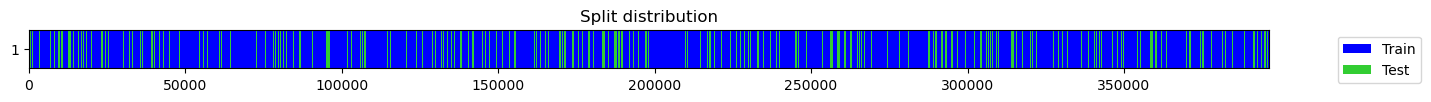

((#316960) [384248,35838,82292,299464,139054,30470,292789,24695,32557,131588...],
 (#79240) [733,110040,333629,17032,40199,89366,141221,62573,289540,51557...])

In [6]:
splits = get_splits(labels, valid_size=.2, stratify=True, random_state=23, shuffle=True)
splits

In [7]:
# spliting labels data

In [8]:
labels_alpha = labels[:,0]
labels_test_alpha = labels_test[:,0]

labels_D = labels[:,1]
labels_test_D = labels_test[:,1]

# Alpha

In [9]:
tfms  = [None, [TSRegression()]]
batch_tfms = TSStandardize(by_sample=True, by_var=True)
dls = get_ts_dls(trajs, labels_alpha, splits=splits, tfms=tfms, batch_tfms=batch_tfms, bs=128)
dls.one_batch()

(TSTensor(samples:128, vars:2, len:200, device=cuda:0, dtype=torch.float32),
 tensor([1.4900, 1.8900, 1.0900, 0.5700, 1.1900, 0.0500, 1.6500, 0.9500, 0.7900,
         1.2300, 0.6100, 0.3300, 1.9700, 0.3700, 0.4100, 0.7100, 1.8500, 0.6900,
         0.0300, 1.5700, 1.2300, 0.1500, 1.1300, 0.2500, 0.4900, 1.5300, 1.5700,
         1.7900, 1.4500, 1.2700, 1.0900, 0.1900, 1.9900, 1.6700, 0.1100, 0.4500,
         1.0300, 0.0900, 1.9300, 0.4100, 1.6300, 1.7300, 0.3900, 0.0300, 0.6500,
         0.5700, 1.8700, 1.3100, 1.6700, 1.6100, 1.0700, 0.5300, 0.2100, 0.9500,
         0.4100, 1.4100, 1.1100, 0.8700, 1.5100, 0.6300, 1.0500, 0.3500, 0.9700,
         0.8700, 0.0300, 1.0900, 1.3500, 0.7300, 1.0900, 0.9500, 0.7300, 1.2700,
         0.0900, 1.1900, 1.8900, 0.6100, 0.8700, 1.9900, 0.9700, 1.0700, 1.0300,
         0.9100, 0.1500, 1.3700, 0.9500, 1.9900, 0.6900, 1.1100, 1.8500, 0.0500,
         0.1100, 0.8900, 1.7500, 0.5100, 0.2500, 0.7900, 1.9900, 0.4900, 0.6500,
         1.7500, 1.7100, 1.4500,

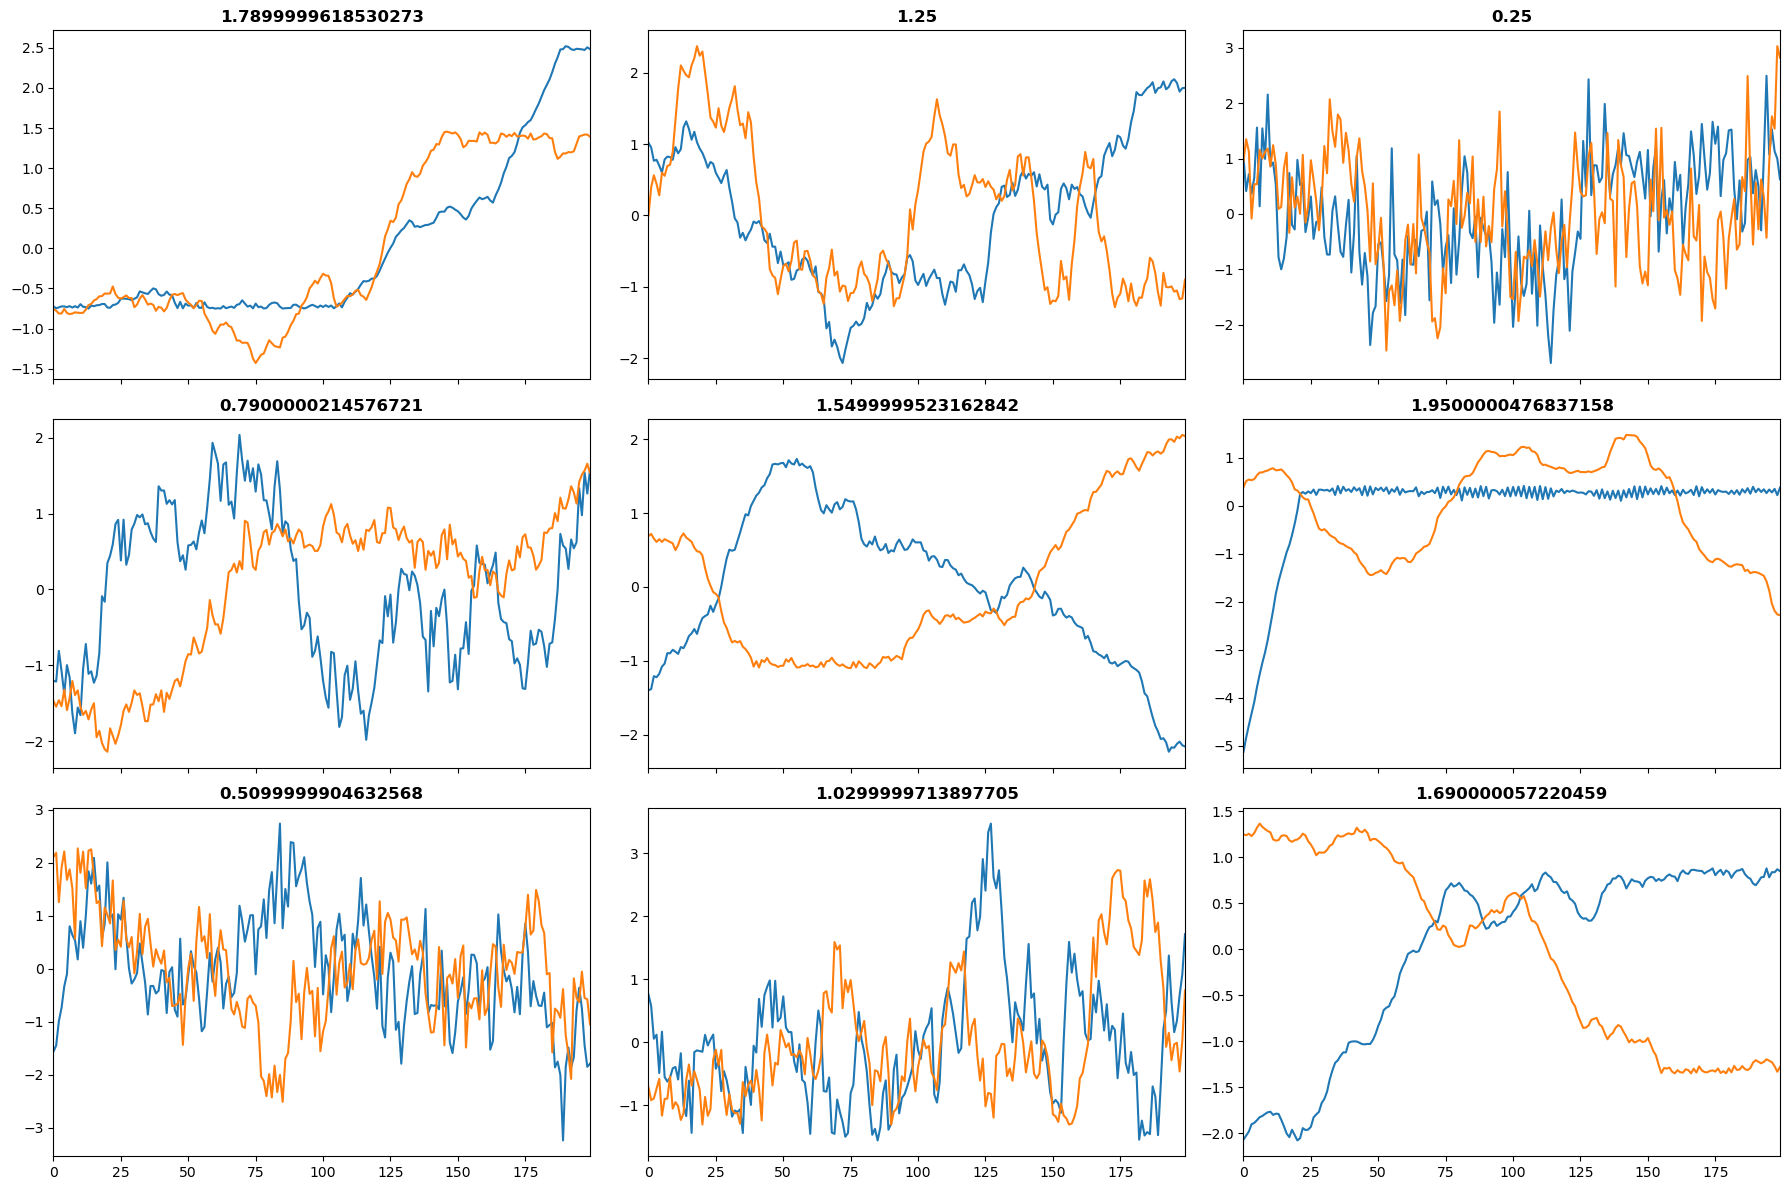

In [10]:
dls.show_batch()

SuggestedLRs(valley=0.0010000000474974513)

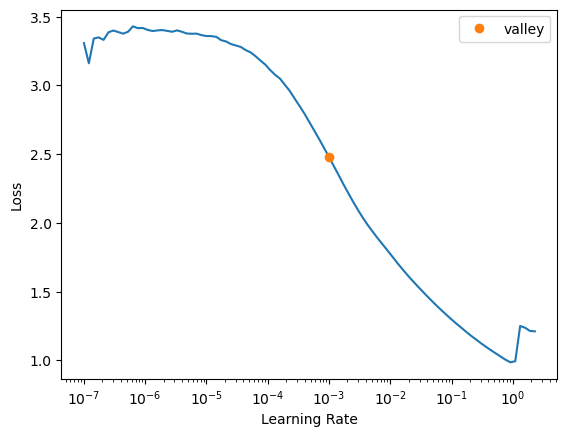

In [11]:

learn = ts_learner(dls, InceptionTime, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()

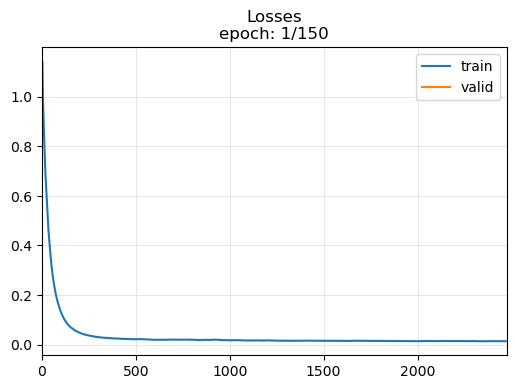

KeyboardInterrupt: 

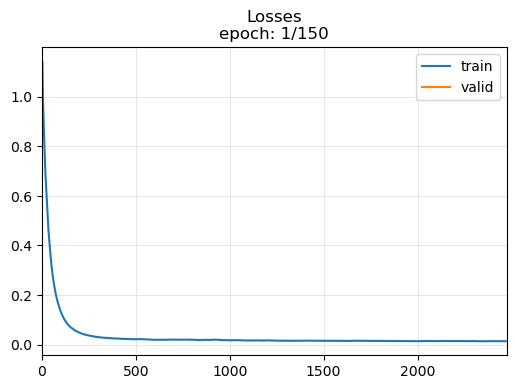

In [12]:
learn = ts_learner(dls, InceptionTime, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(150, learn.lr)

In [48]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)

0.0446457303604046

As you can see, this matches the valid rmse at the end of training, so the model is predicting correctly. Now you can pass any data and generate other predictions.

In [75]:

probas, _, preds = learn.get_X_preds(trajs_test_1)


In [76]:
print("Length of preds:", len(preds))
print("Length of labels_test:", len(labels_test_alpha))


Length of preds: 2000
Length of labels_test: 100


In [77]:
labels_test.shape

(100, 2)

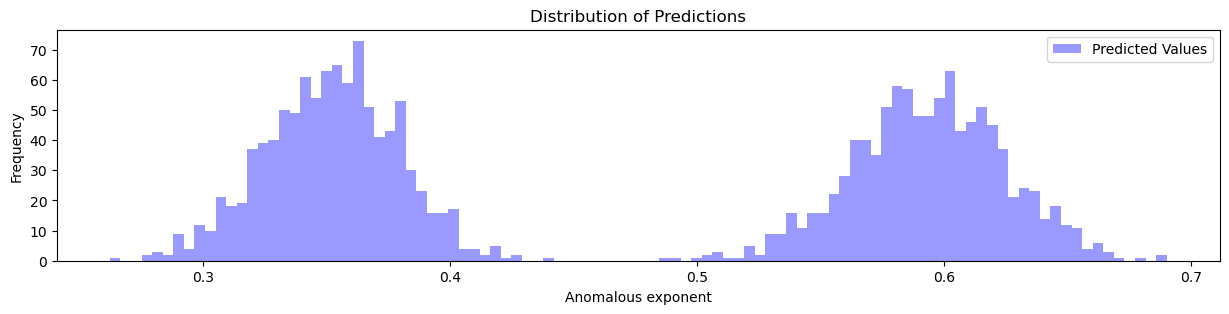

In [78]:
import matplotlib.pyplot as plt
import numpy as np

preds_flat = np.array(preds).flatten()
labesl_flat = np.array(labels_test_alpha).flatten()
fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(labesl_flat, bins=100, alpha=0.4, color='green', label='True')

ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# FCN

SuggestedLRs(valley=0.002511886414140463)

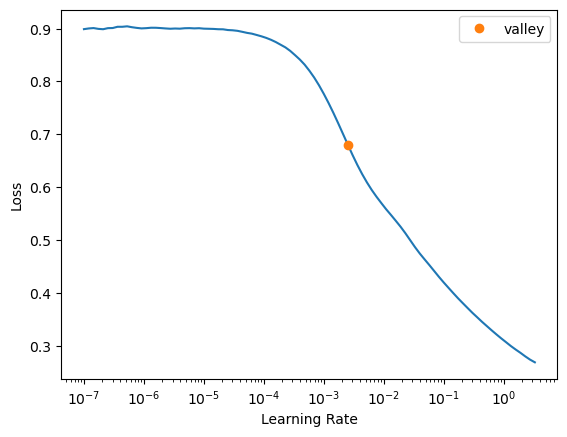

In [91]:
learn = ts_learner(dls, FCN, metrics=rmse, cbs=ShowGraph())
learn.lr_find()



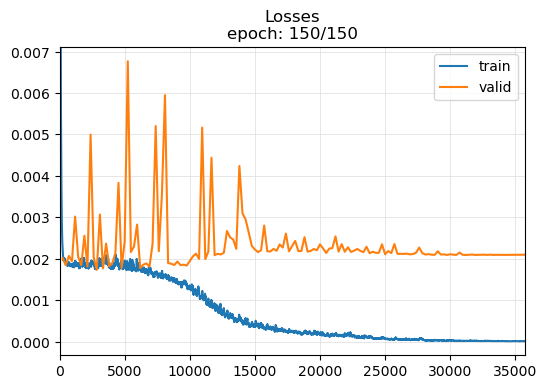

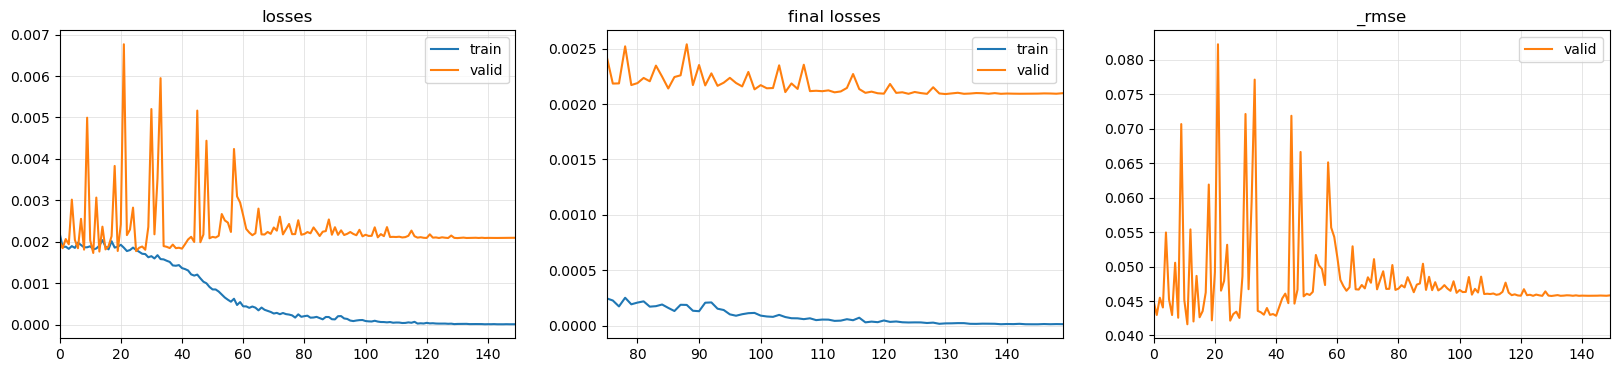

In [92]:
learn = ts_learner(dls, FCN, metrics=rmse, cbs=ShowGraph())
learn.fit_one_cycle(150, 1e-2)


In [93]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)


0.04580342401704556

In [100]:

probas, _, preds = learn.get_X_preds(trajs_test)


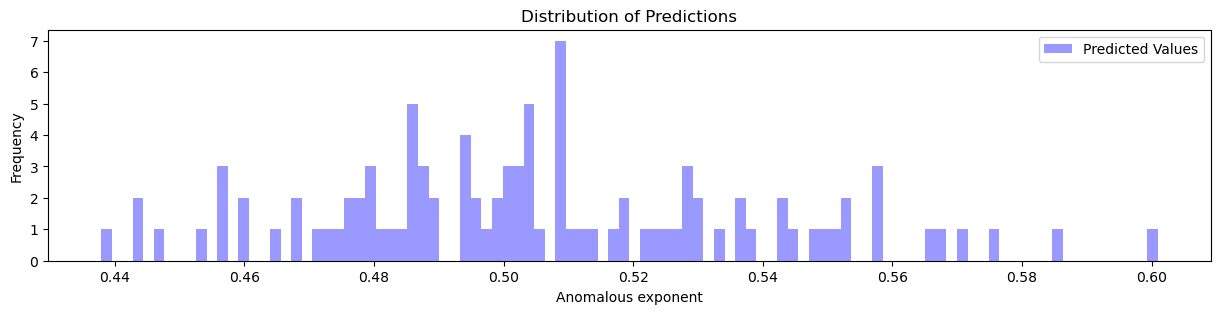

In [101]:
import matplotlib.pyplot as plt
import numpy as np
preds_flat = np.array(preds).flatten() 


fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')


ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# GRU

SuggestedLRs(valley=0.001737800776027143)

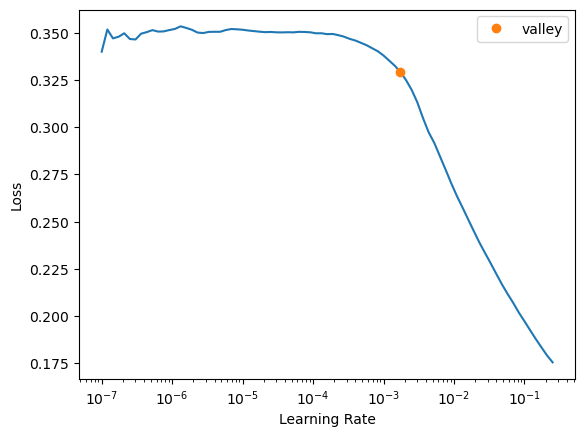

In [118]:
learn = ts_learner(dls, GRU, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()

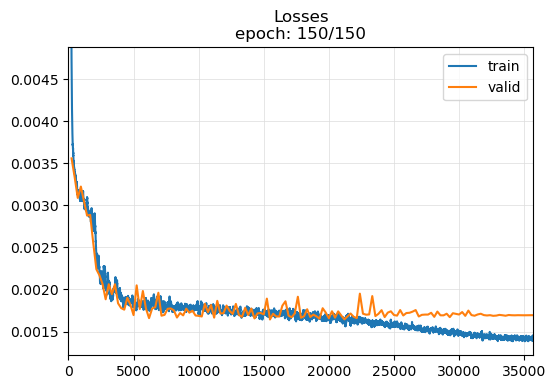

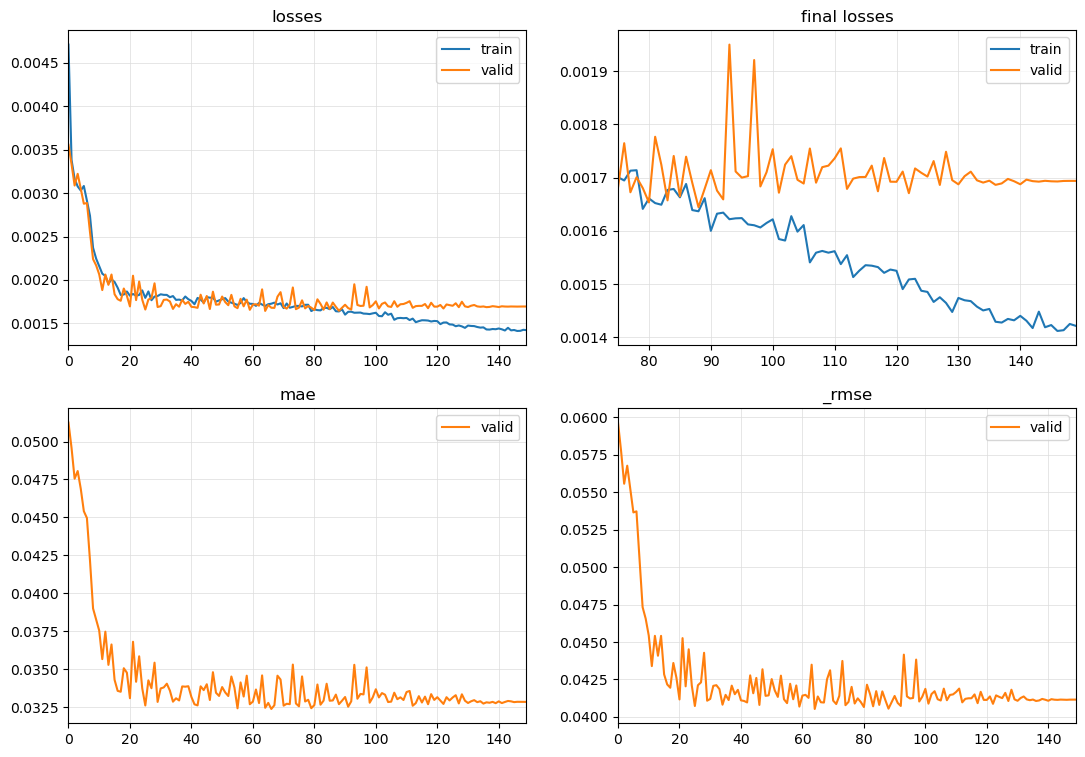

In [119]:

learn = ts_learner(dls, GRU, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(150, 1e-2)

In [121]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)

0.041155352917416295

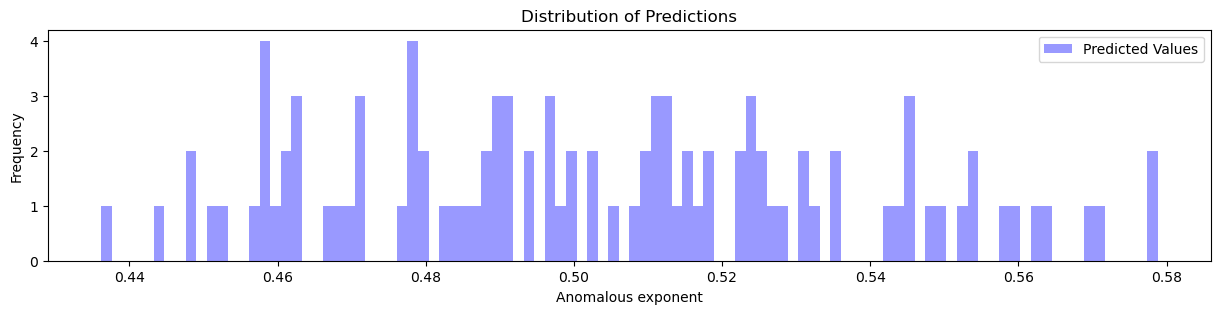

In [125]:

probas, _, preds = learn.get_X_preds(trajs_test)
import matplotlib.pyplot as plt
import numpy as np

preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# MLP

FlattenedLoss of MSELoss()

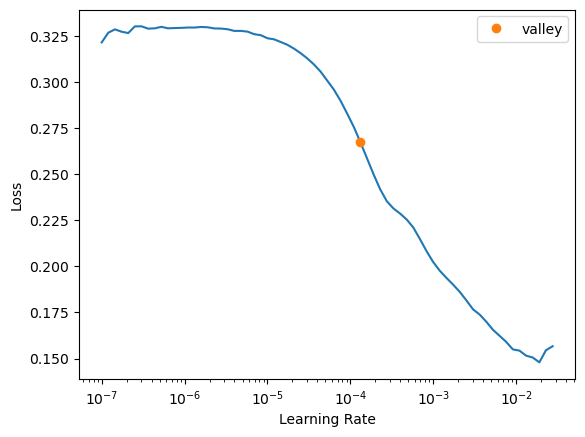

In [126]:

learn = ts_learner(dls, MLP, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()

learn.loss_func


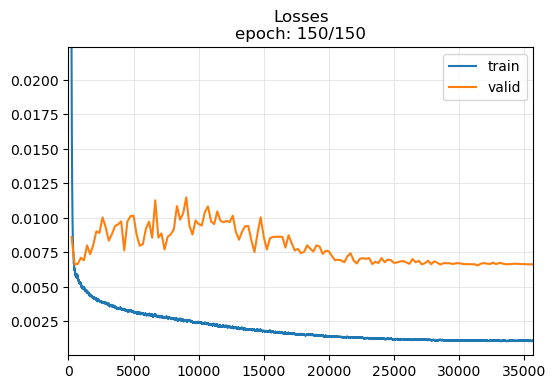

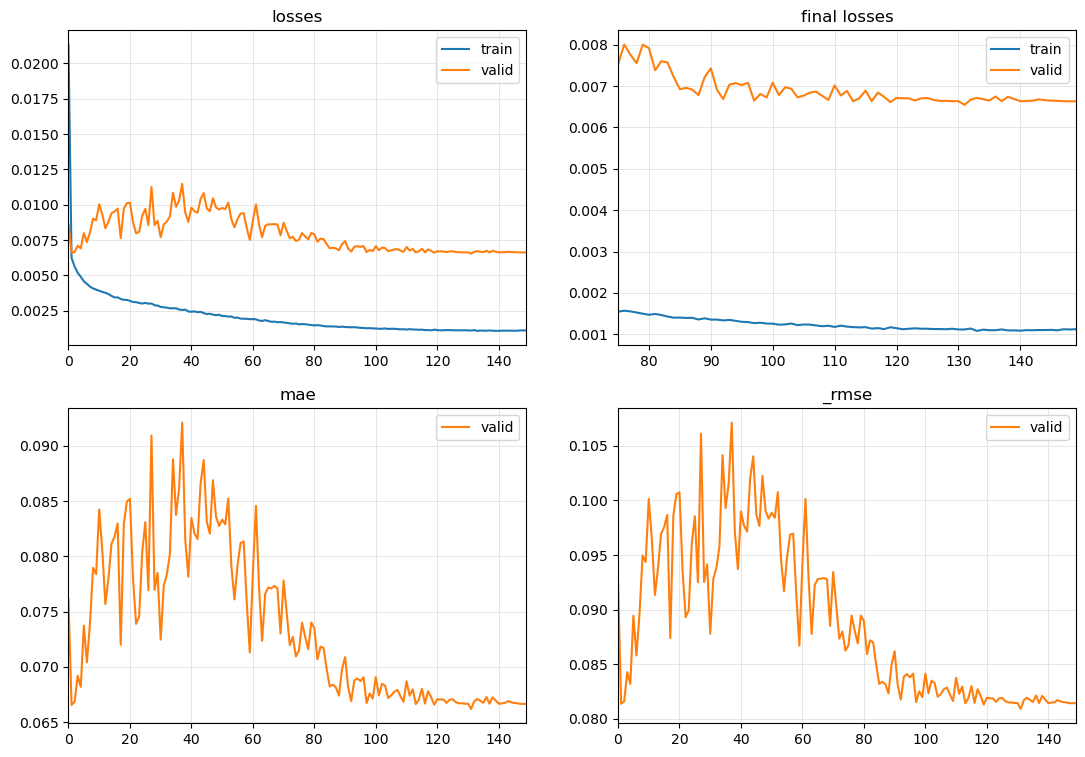

In [128]:
learn = ts_learner(dls, MLP, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(150, 1e-4)

In [129]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)

0.08144038997608187

In [130]:
trajs_test.shape

(100, 4, 200)

In [131]:

probas, _, preds = learn.get_X_preds(trajs_test)


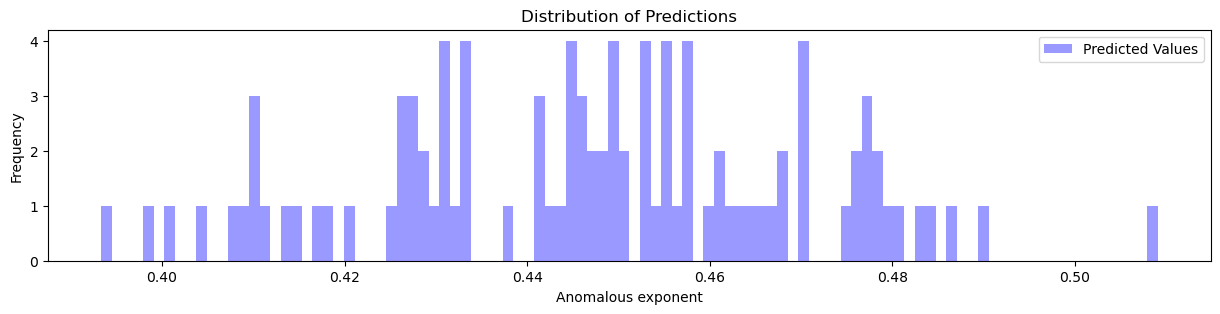

In [132]:

probas, _, preds = learn.get_X_preds(trajs_test)
import matplotlib.pyplot as plt
import numpy as np

preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# TSTPlus

SuggestedLRs(valley=1.737800812406931e-05)

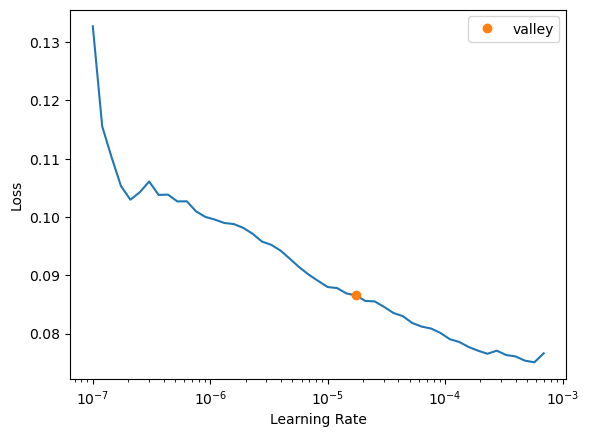

In [134]:

learn = ts_learner(dls, TSTPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()

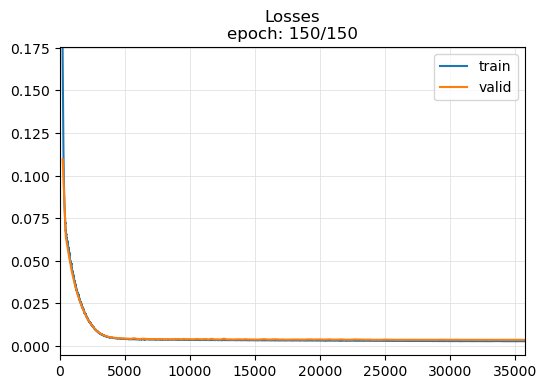

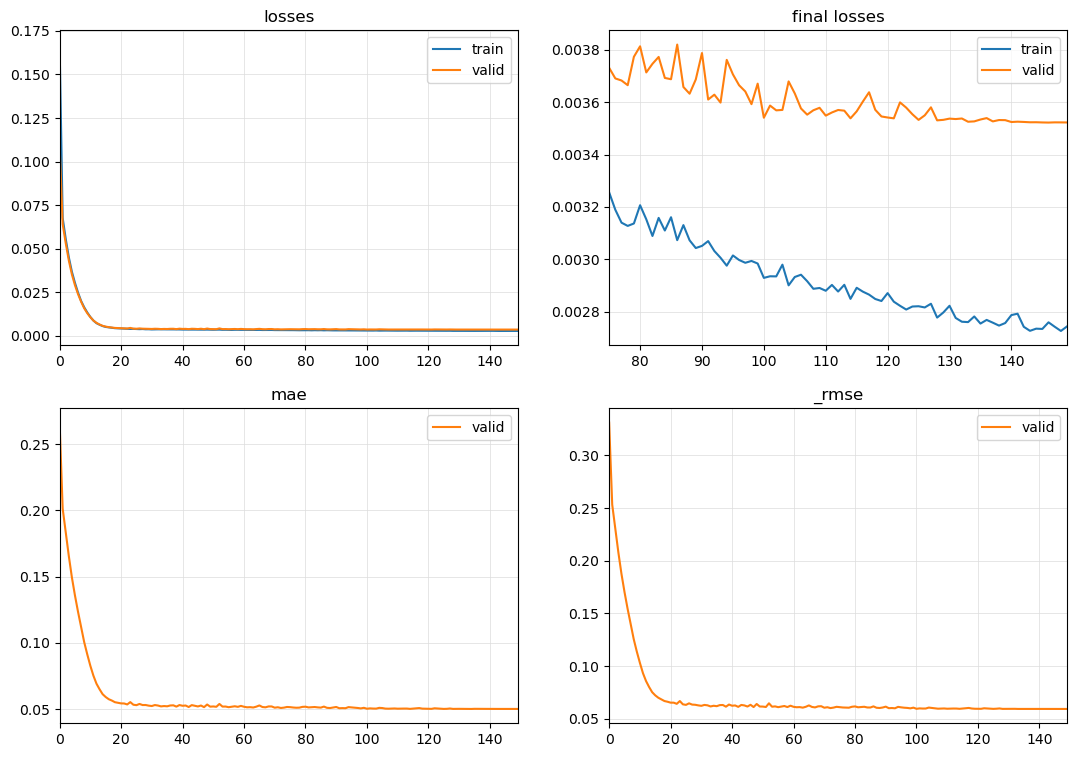

In [135]:
learn.loss_func
learn = ts_learner(dls, TSTPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(150, 1e-5)

In [136]:
trajs_test.shape

(100, 4, 200)

In [137]:
trajs.shape

(38100, 4, 200)

In [138]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)

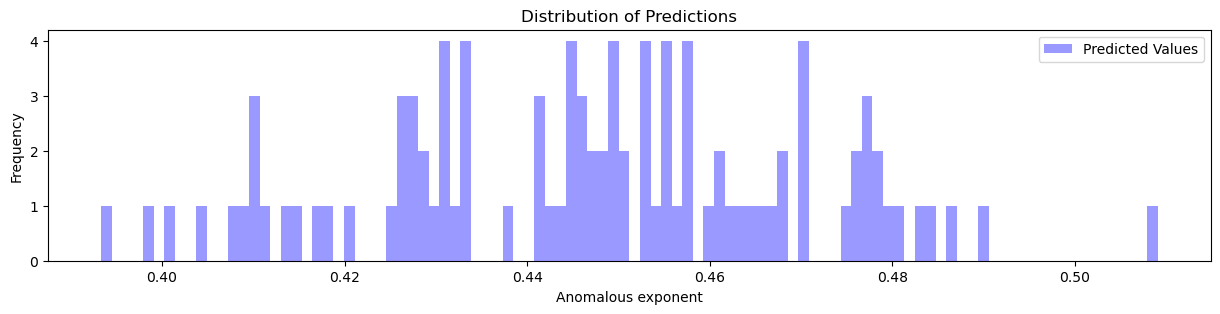

In [139]:
reds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

# ResNet

FlattenedLoss of MSELoss()

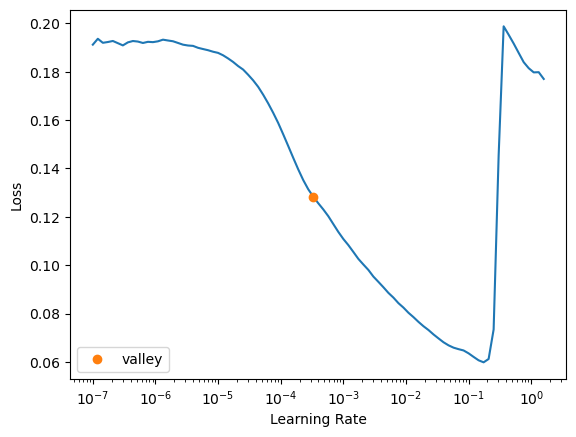

In [15]:

learn = ts_learner(dls, ResNet, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func

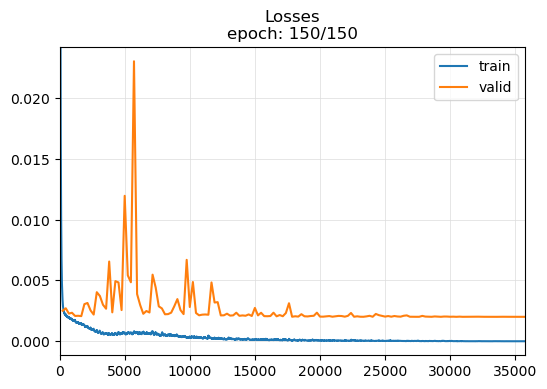

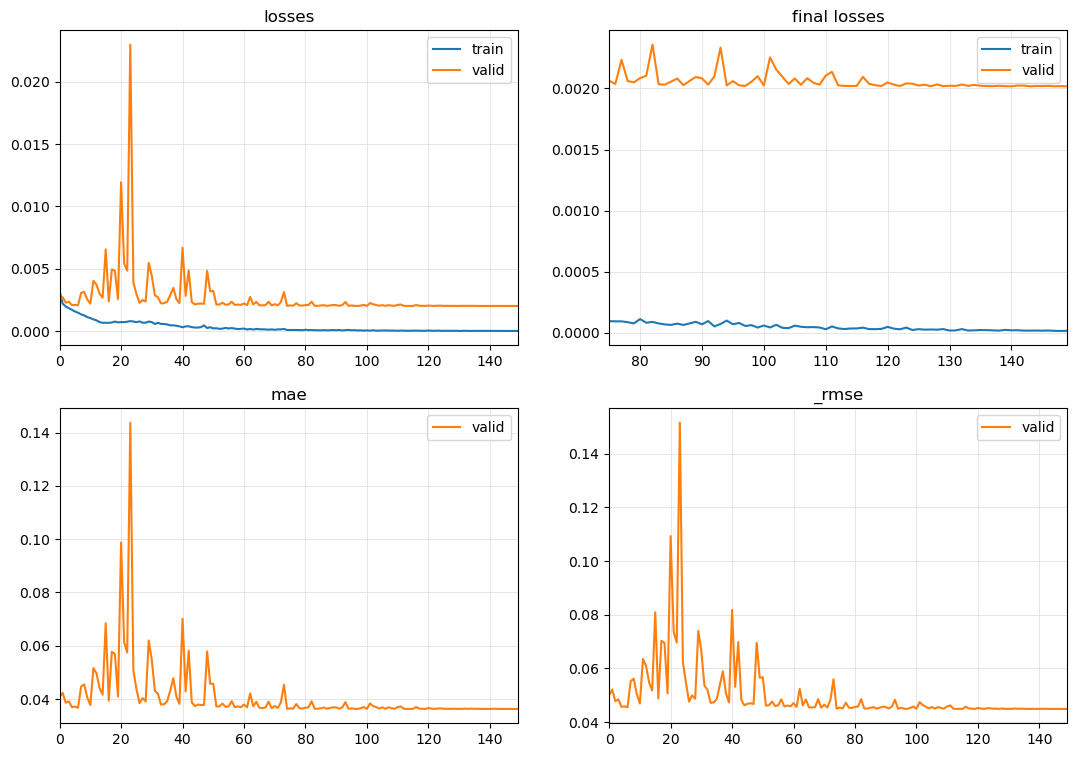

In [16]:

learn = ts_learner(dls, ResNet, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(150, 1e-3)

In [30]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)

0.04492211524094858

In [31]:
probas, _, preds = learn.get_X_preds(trajs_test)

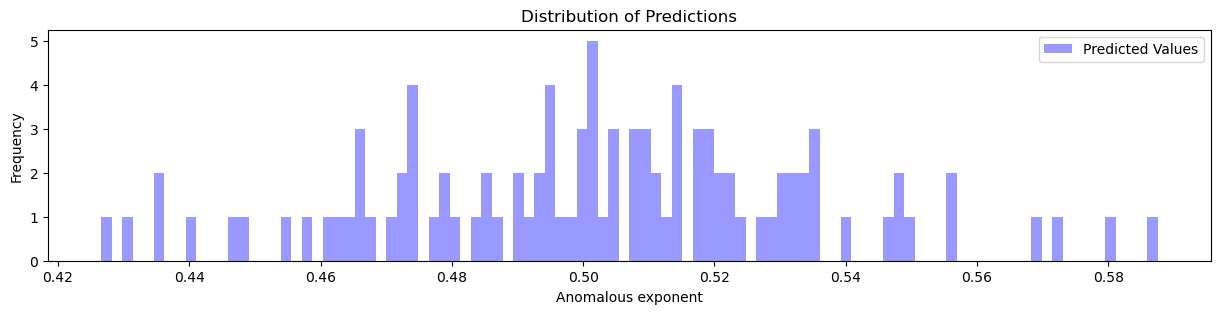

In [32]:
preds_flat = np.array(preds).flatten()  
Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# TSiT

FlattenedLoss of MSELoss()

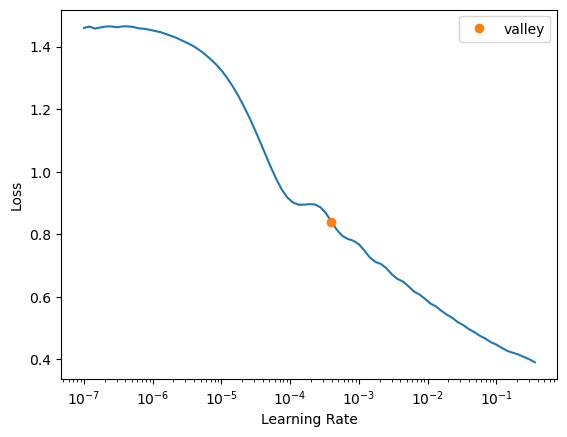

In [16]:

learn = ts_learner(dls, TSiT, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func

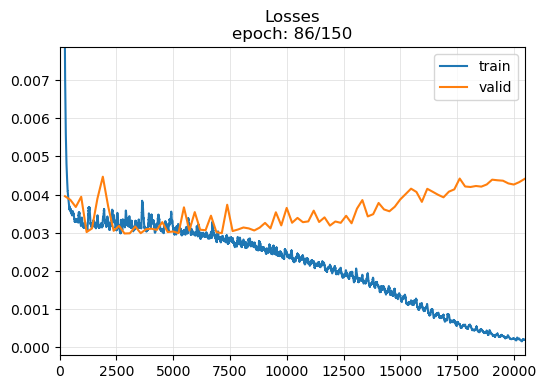

KeyboardInterrupt: 

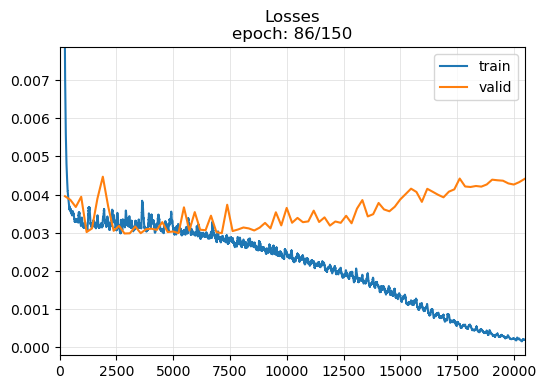

In [17]:

learn = ts_learner(dls, TSiT, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(150, 1e-3)

In [18]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)

0.06590329485906363

In [19]:
probas, _, preds = learn.get_X_preds(trajs_test)

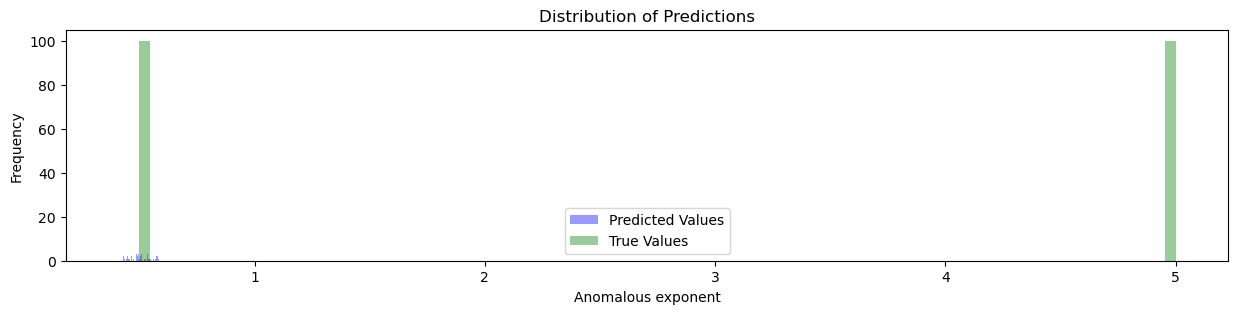

In [20]:
preds_flat = np.array(preds).flatten()  
Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# MiniRocket

FlattenedLoss of MSELoss()

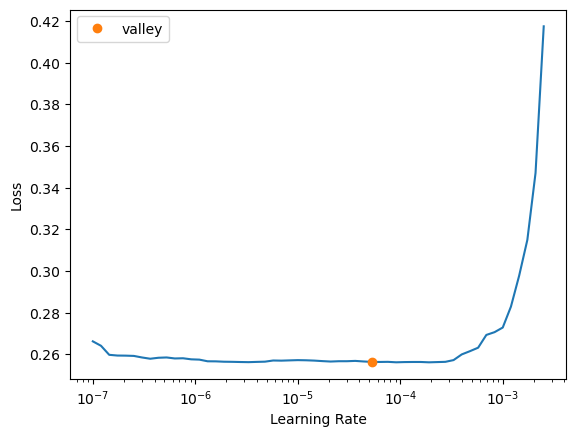

In [21]:

learn = ts_learner(dls, MiniRocket, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func

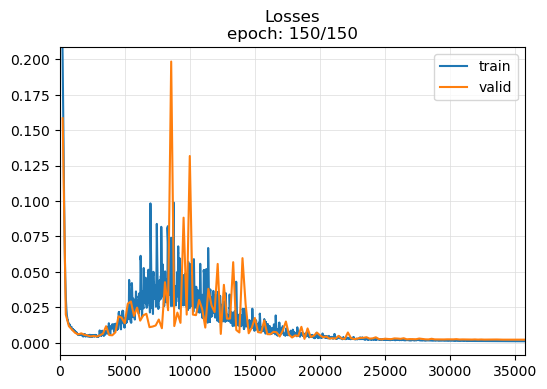

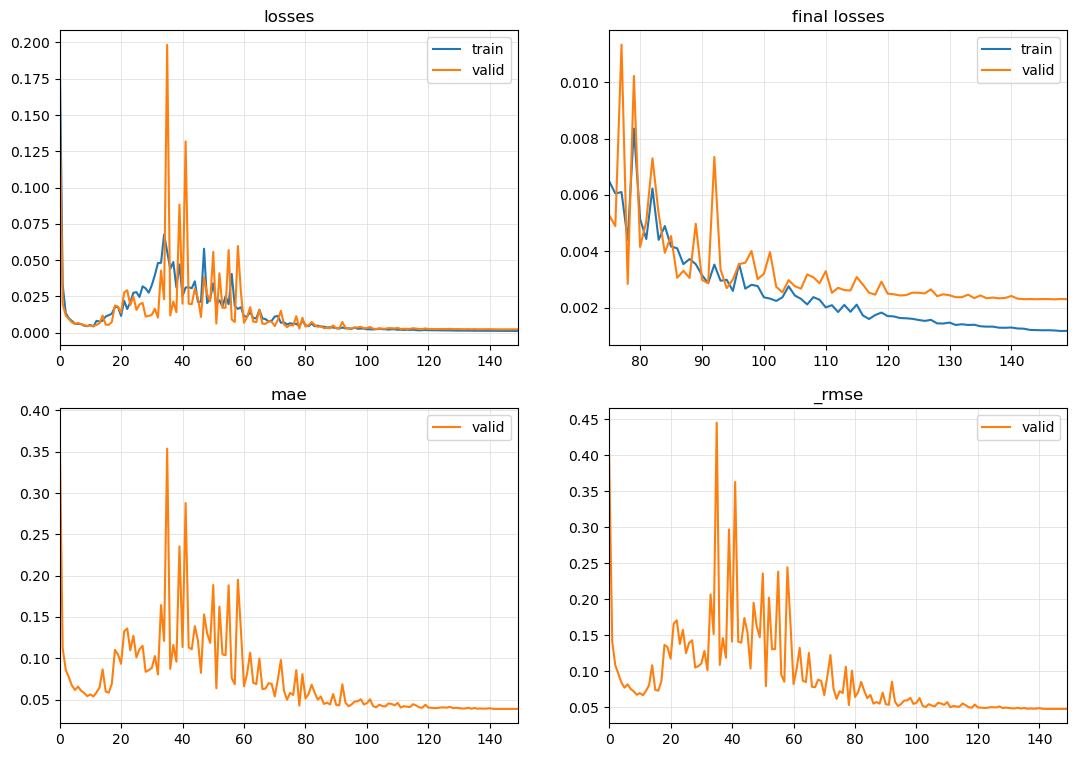

In [22]:

learn = ts_learner(dls, MiniRocket, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(150, learn.lr)

In [23]:


probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)

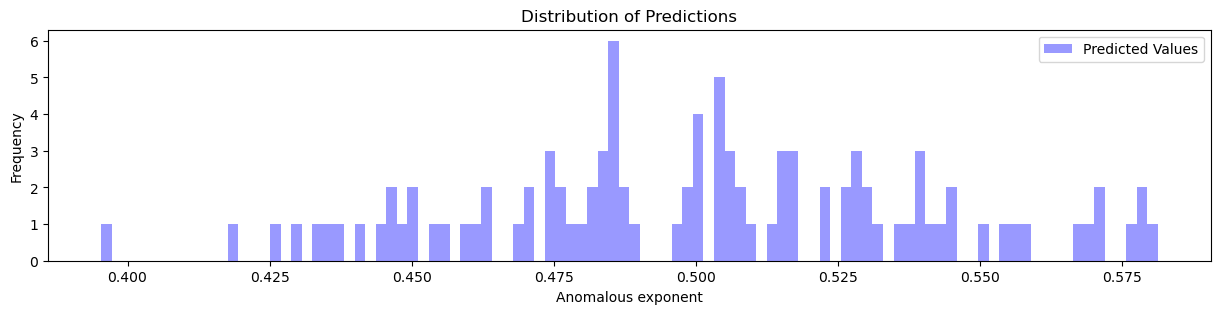

In [24]:
preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# RNN_FCN

SuggestedLRs(valley=0.0012022644514217973)

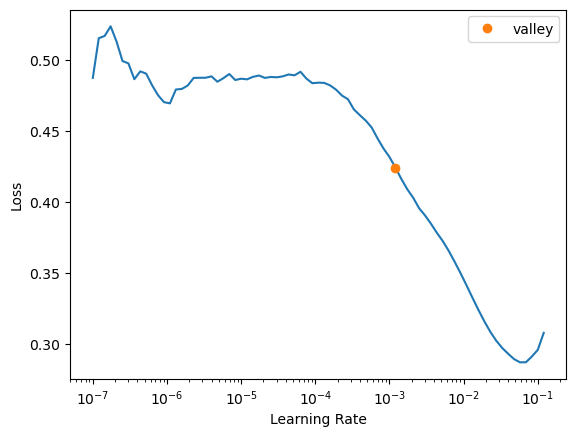

In [25]:
learn = ts_learner(dls, RNN_FCN, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()

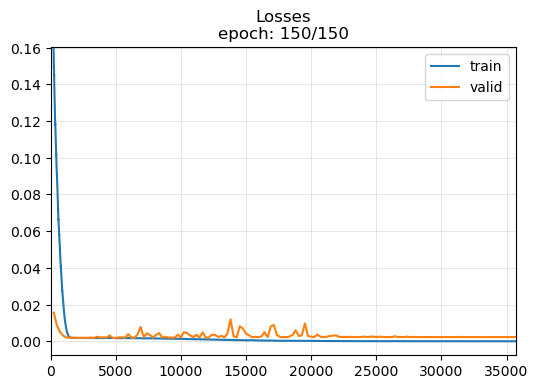

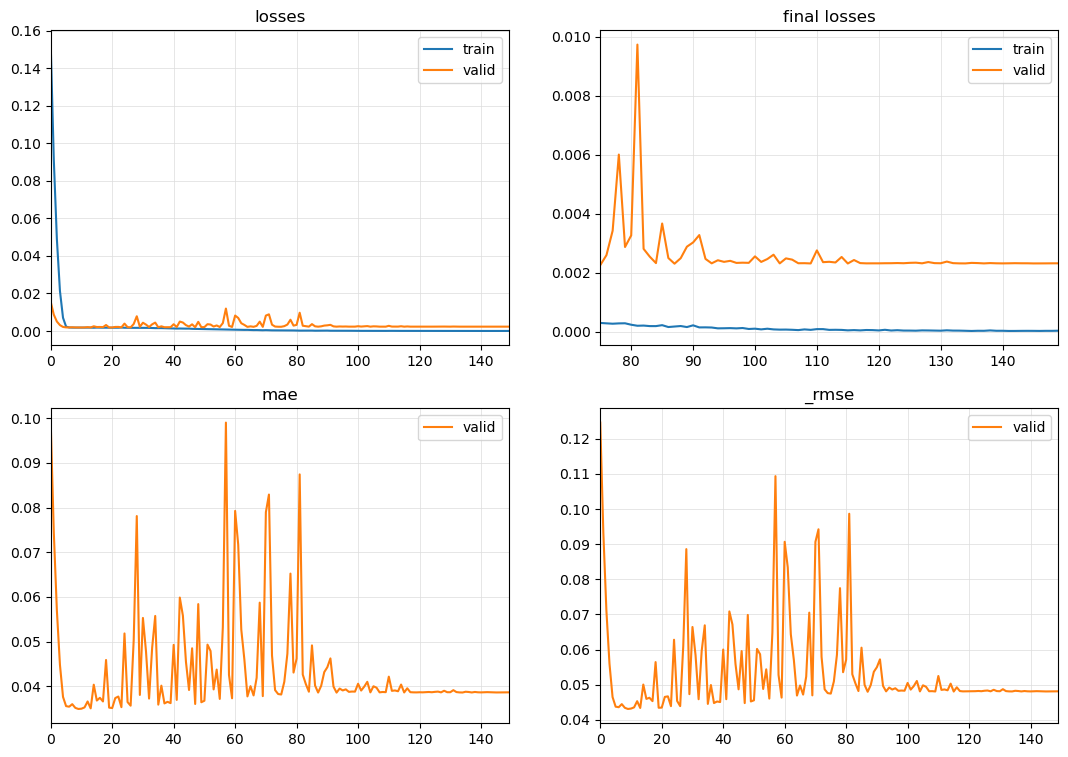

In [26]:

learn = ts_learner(dls, RNN_FCN, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(150, learn.lr)

In [27]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)

0.04810156696034541

In [28]:

probas, _, preds = learn.get_X_preds(trajs_test)

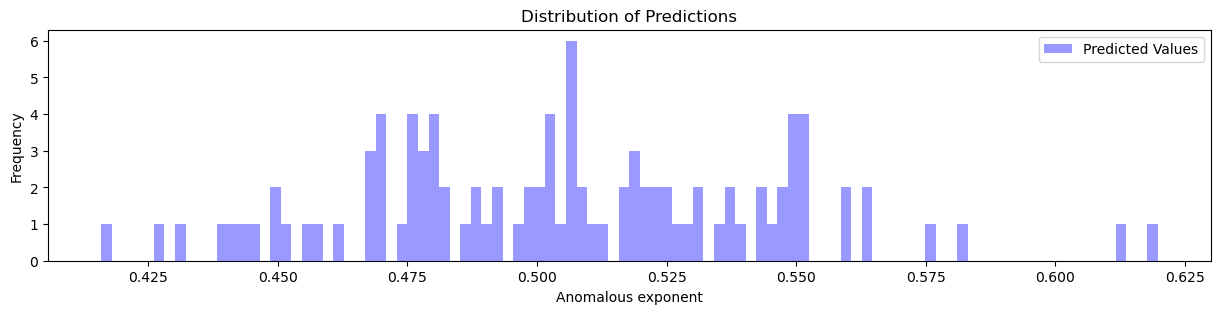

In [29]:


preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

# XceptionTime

SuggestedLRs(valley=0.001737800776027143)

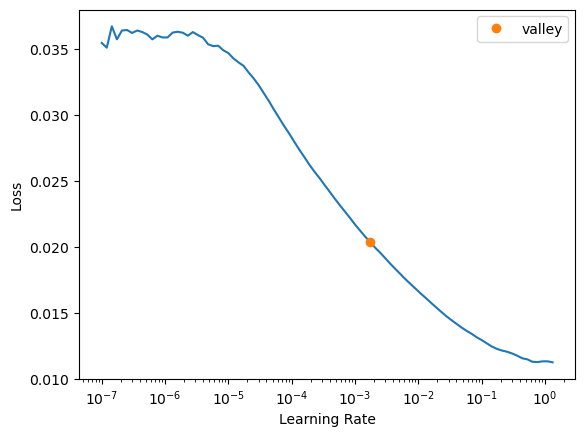

In [30]:
learn = ts_learner(dls, XceptionTime, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()


In [31]:
learn.loss_func

FlattenedLoss of MSELoss()

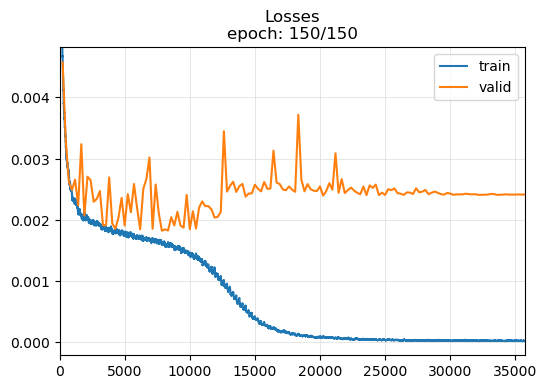

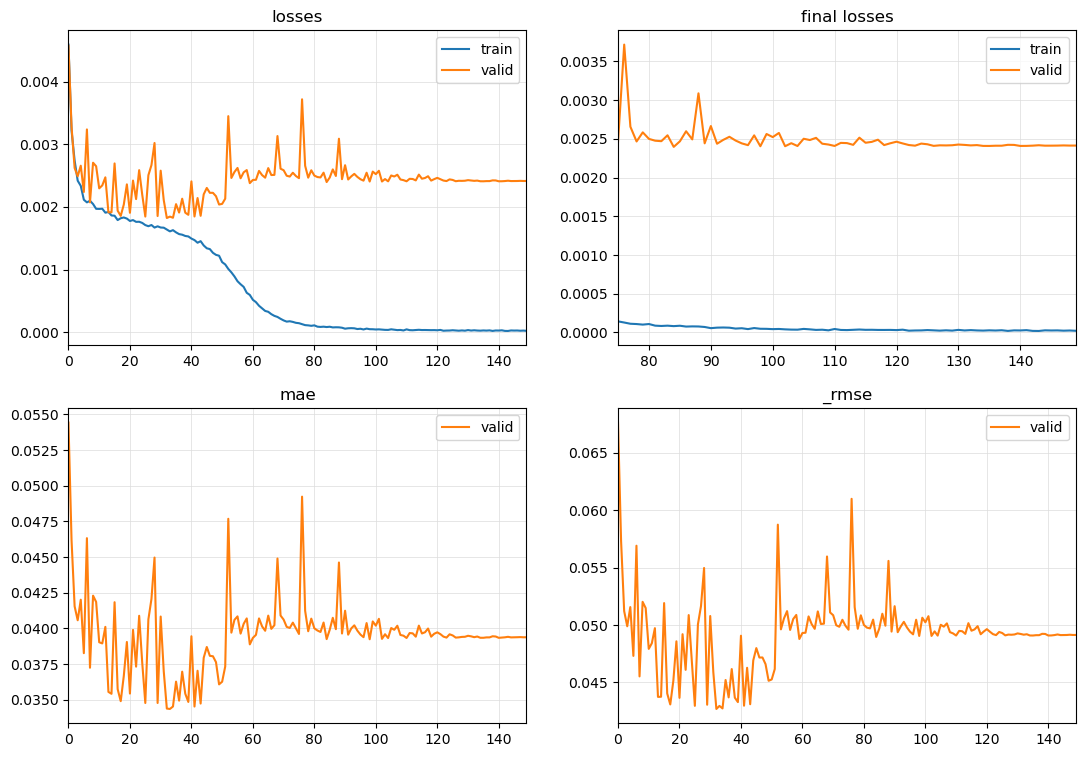

In [32]:

learn = ts_learner(dls, XceptionTime, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(150, learn.lr)


In [33]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)


0.04913519295264328

In [34]:
probas, _, preds = learn.get_X_preds(trajs_test)



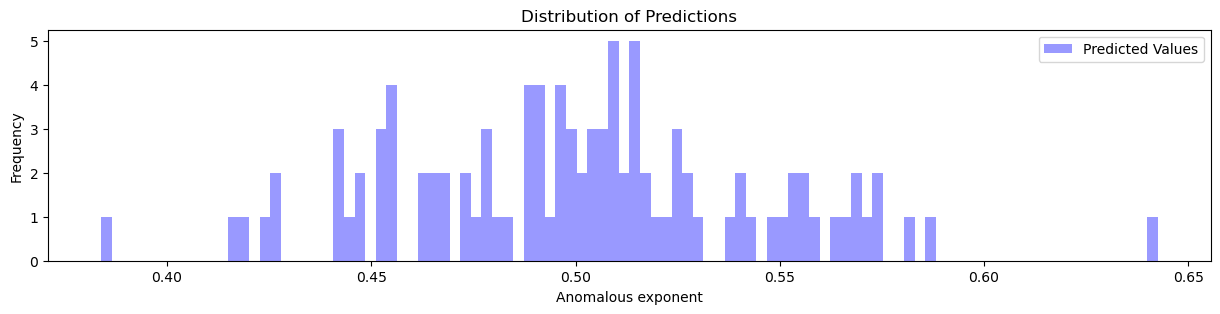

In [35]:
preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

# mWDN

SuggestedLRs(valley=0.00019054606673307717)

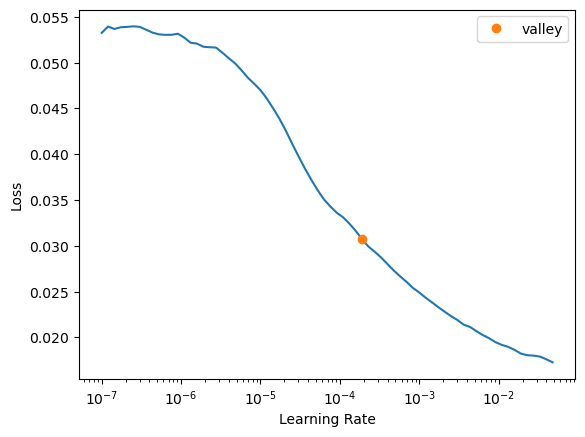

In [36]:

learn = ts_learner(dls, mWDN, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()



In [37]:
learn.loss_func

FlattenedLoss of MSELoss()

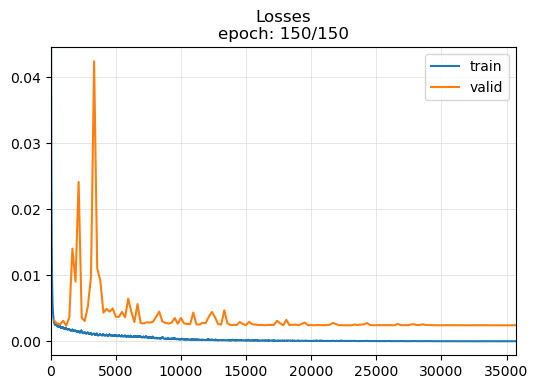

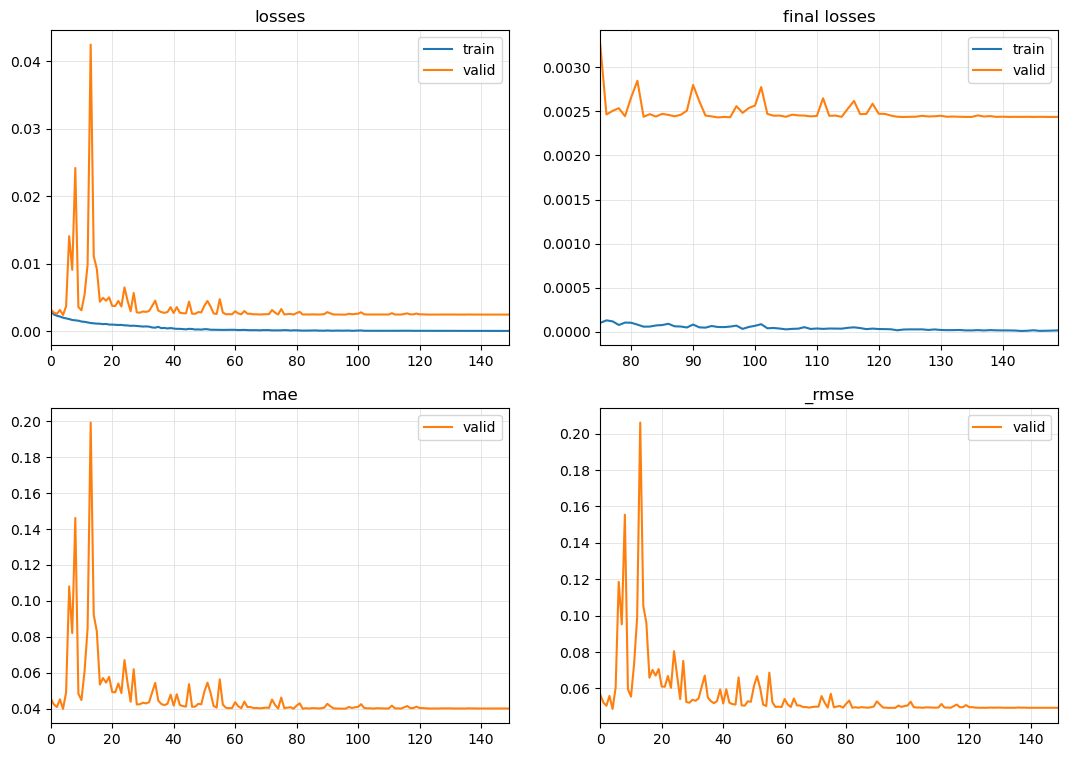

In [38]:

learn = ts_learner(dls, mWDN, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(150, learn.lr)



In [39]:
probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)


0.04936409887998433

In [40]:
probas, _, preds = learn.get_X_preds(trajs_test)



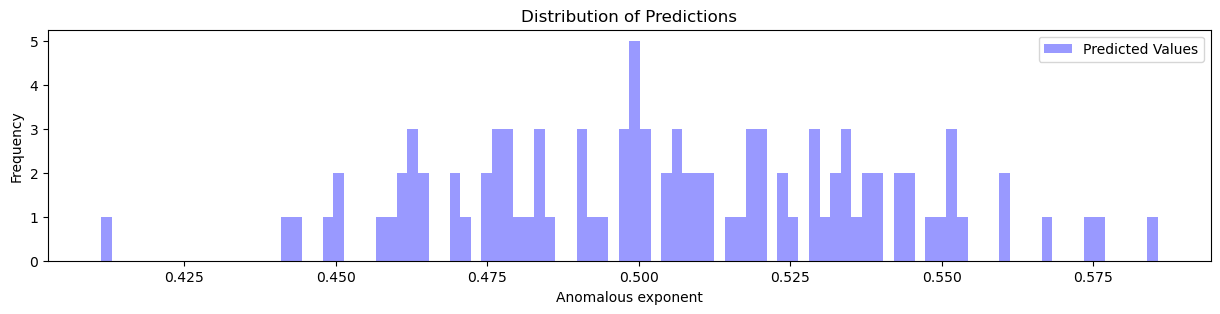

In [41]:
preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

# LSTMAttention

FlattenedLoss of MSELoss()

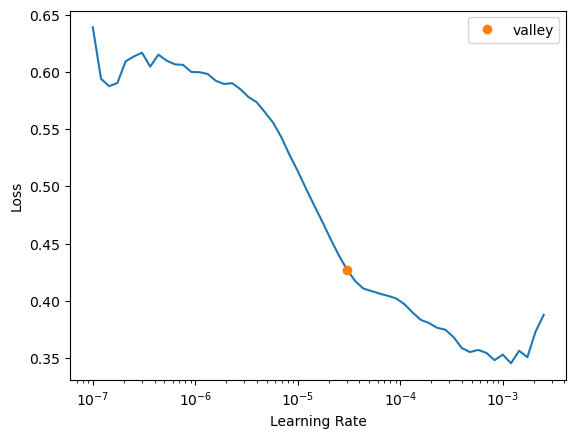

In [42]:

learn = ts_learner(dls, LSTMAttention, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func



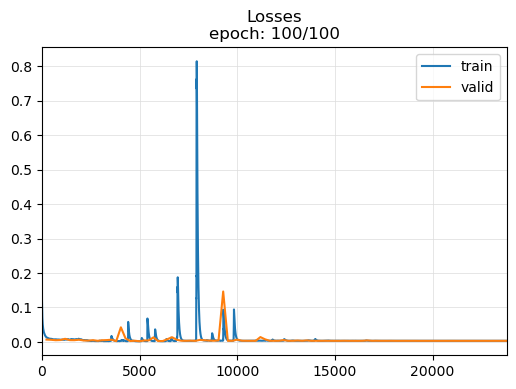

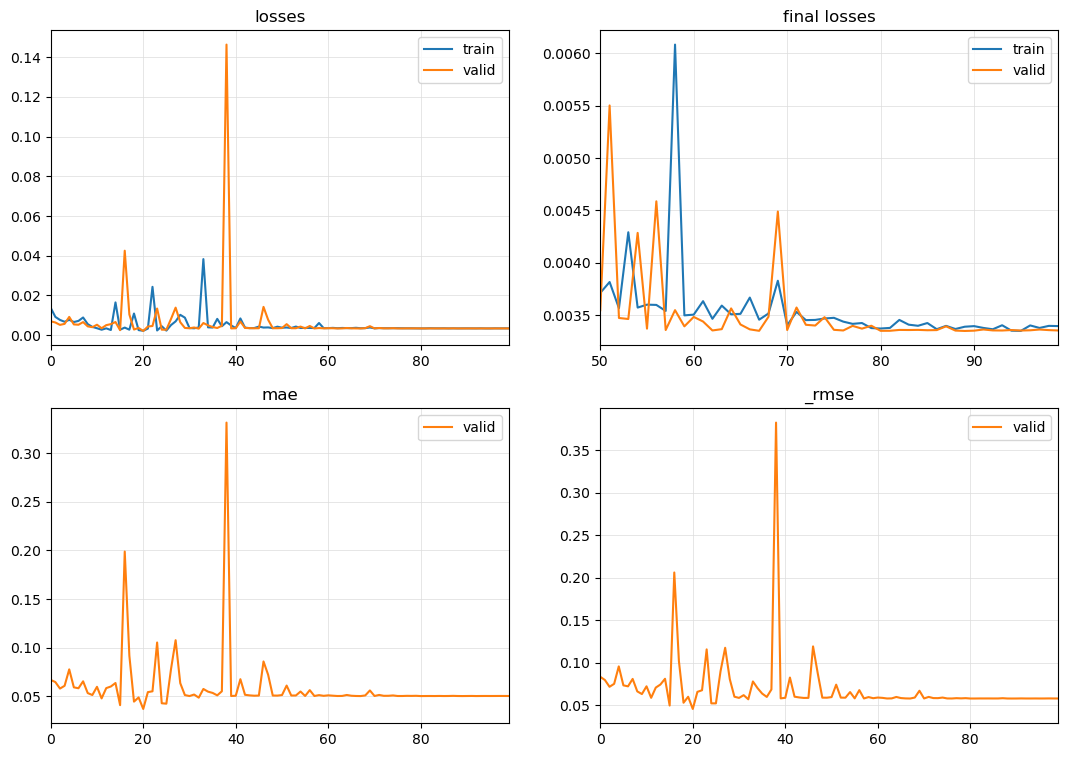

In [44]:
learn = ts_learner(dls, LSTMAttention, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(100, learn.lr)



In [45]:
probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)



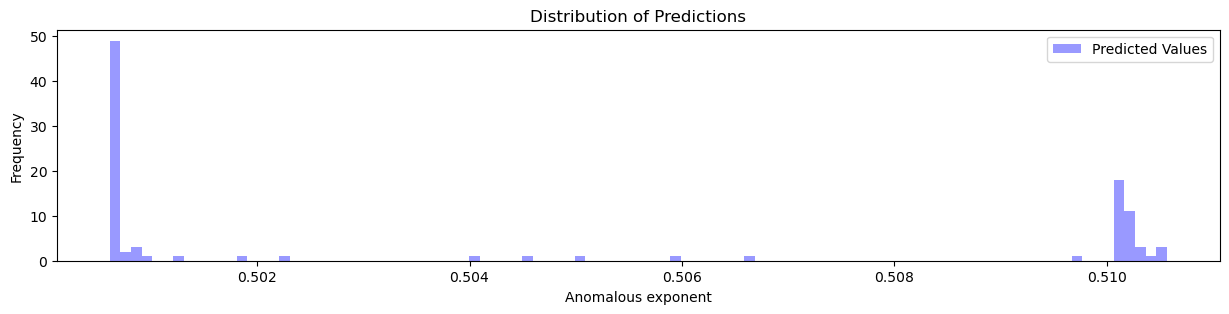

In [46]:
preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()

# gml

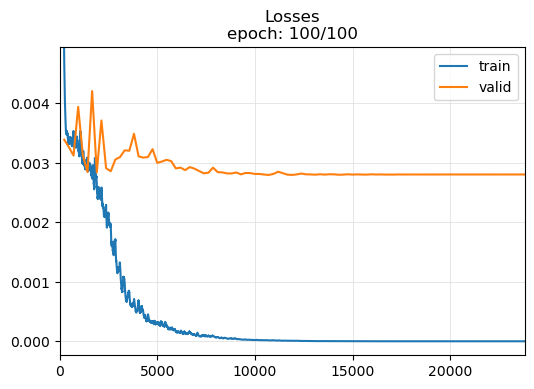

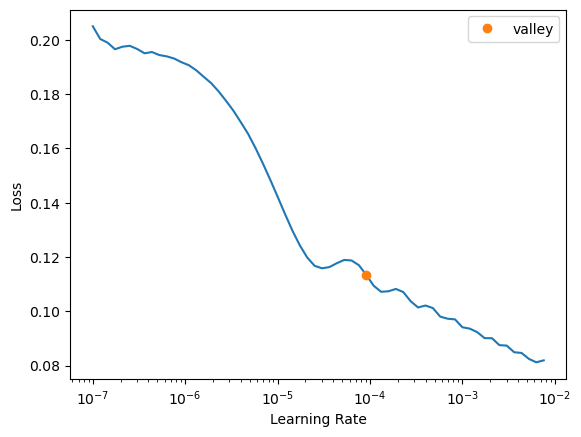

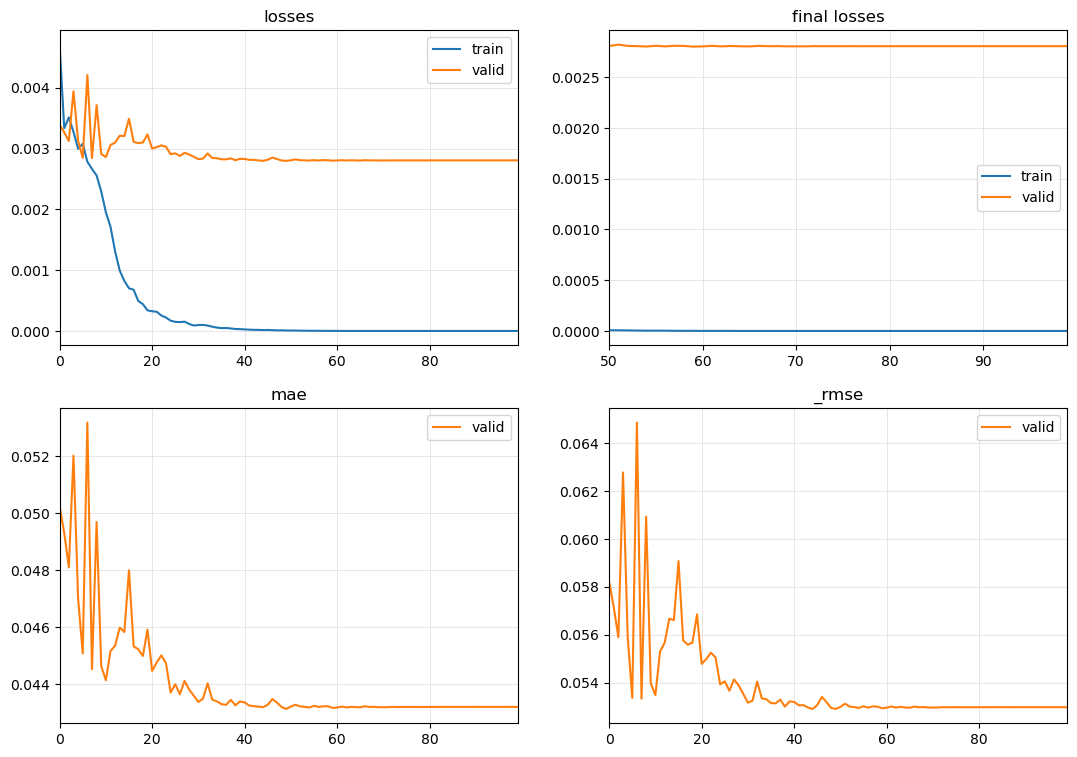

In [47]:

learn = ts_learner(dls, gMLP, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func
learn = ts_learner(dls, gMLP, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(100, learn.lr)

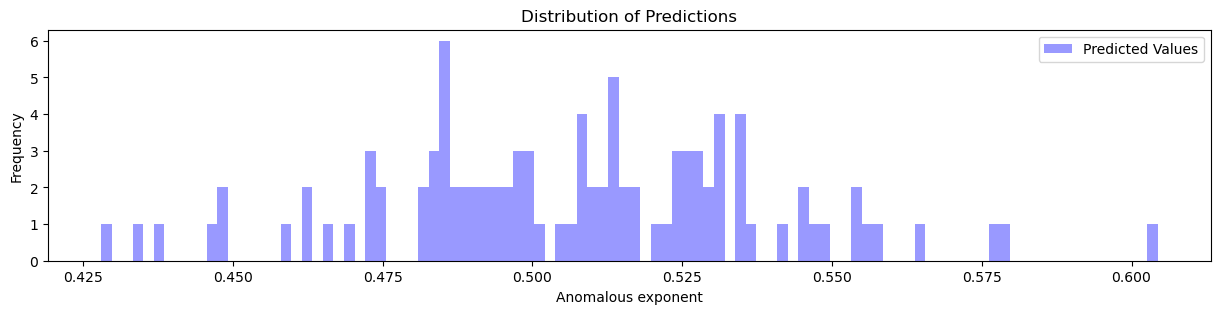

In [48]:


probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)

preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# GRUAttention

FlattenedLoss of MSELoss()

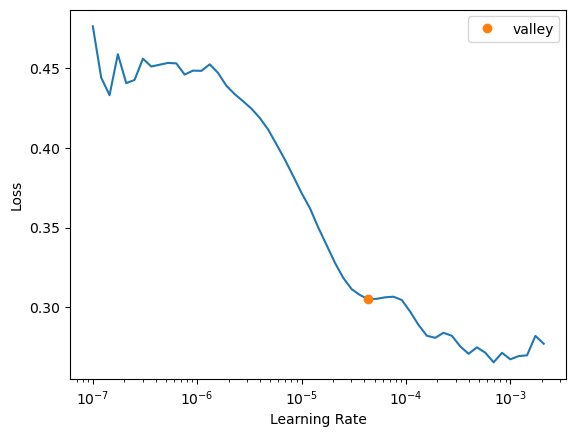

In [50]:

learn = ts_learner(dls, GRUAttention, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func

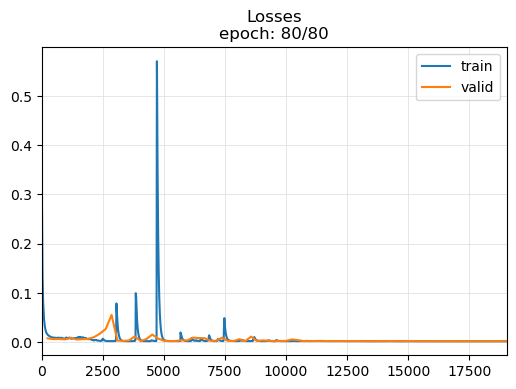

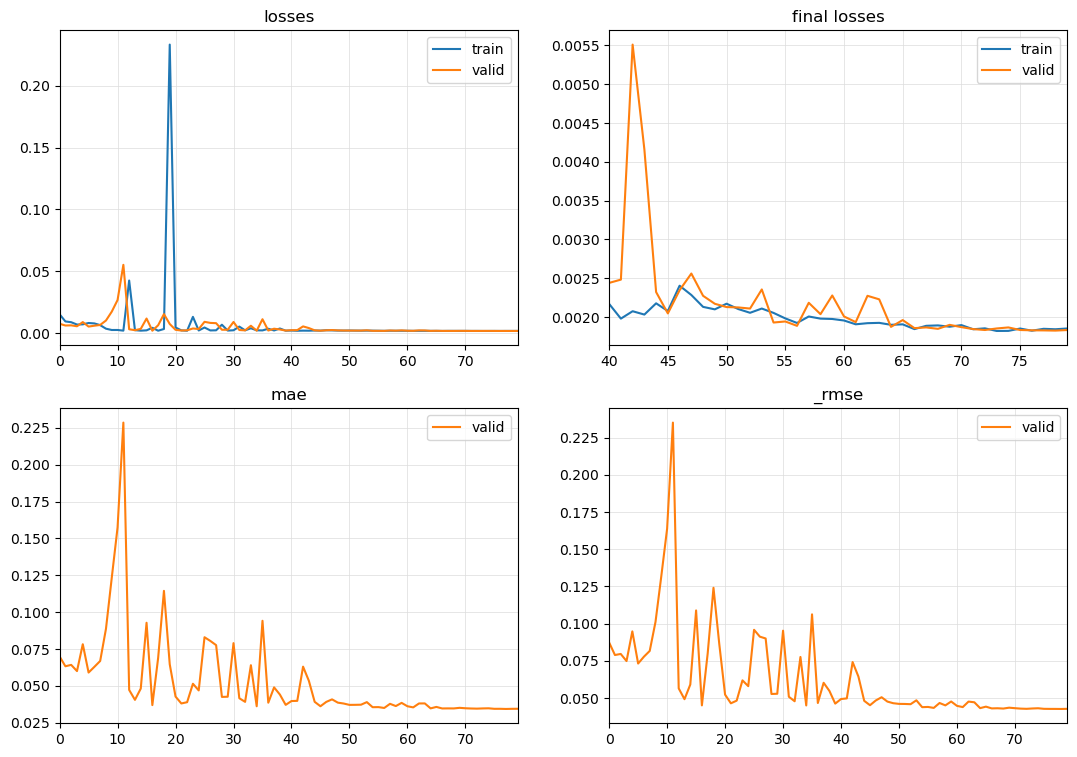

In [51]:

learn = ts_learner(dls, GRUAttention, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(80, learn.lr)


In [52]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)


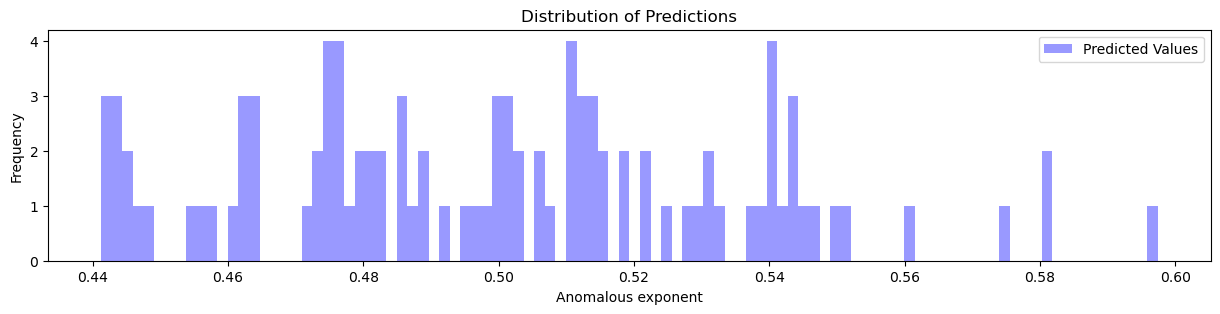

In [53]:


preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# MRNN_FCN

FlattenedLoss of MSELoss()

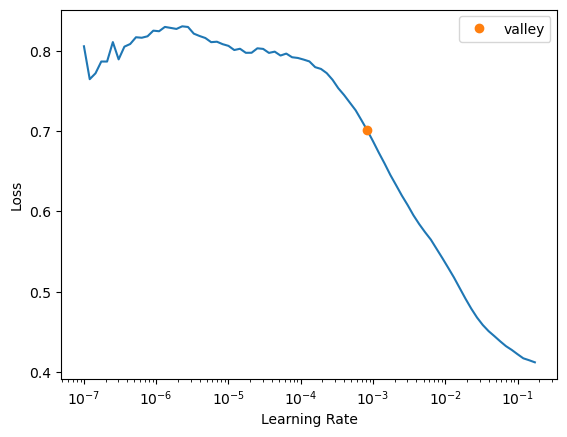

In [54]:

learn = ts_learner(dls, MRNN_FCN, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func

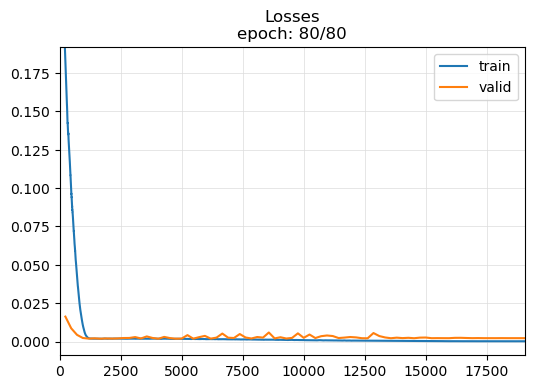

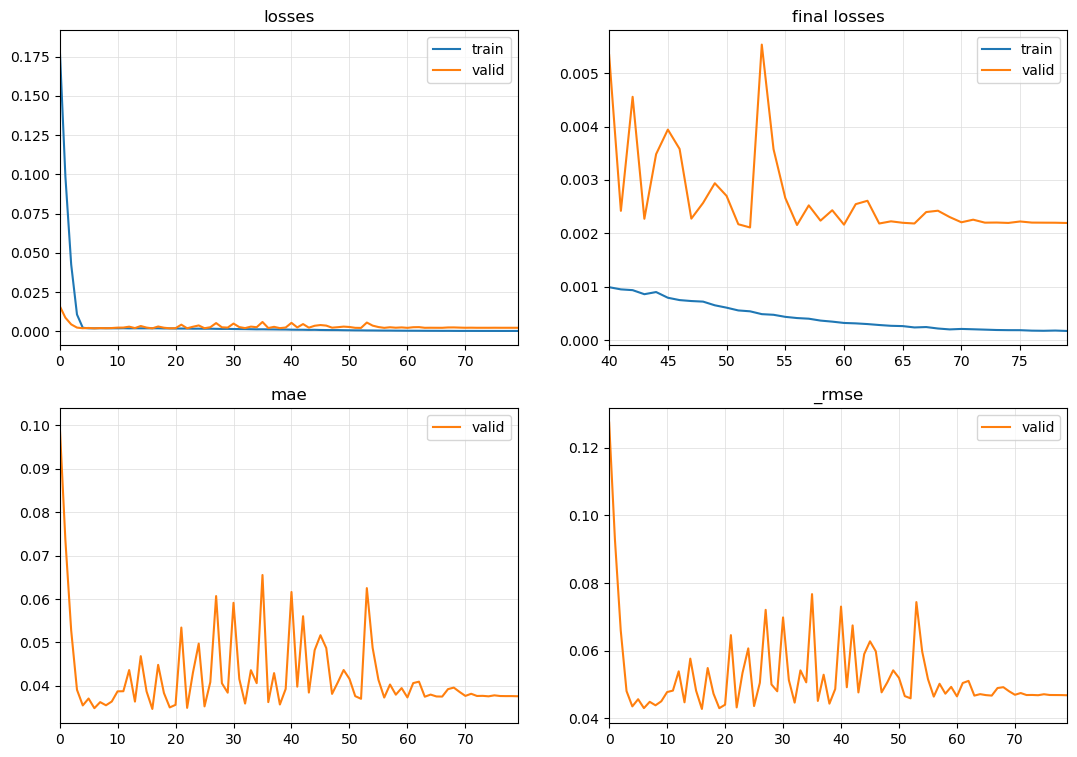

In [55]:

learn = ts_learner(dls, MRNN_FCN, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(80, learn.lr)



In [56]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)

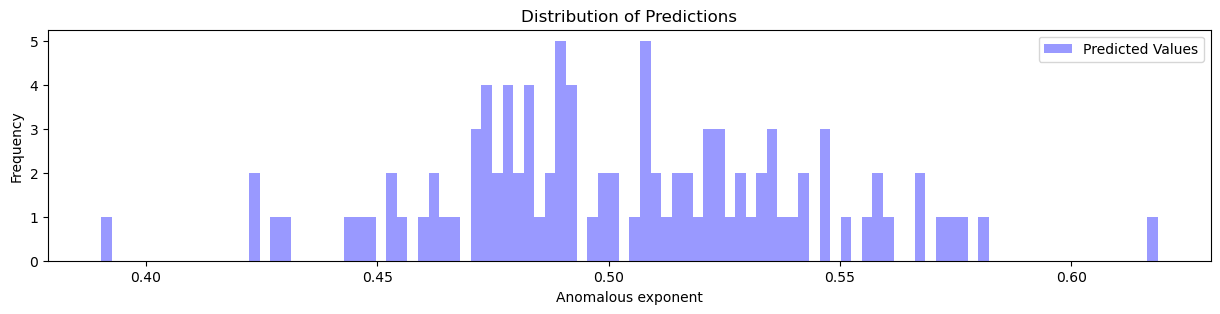

In [57]:


preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# LSTM_FCN

FlattenedLoss of MSELoss()

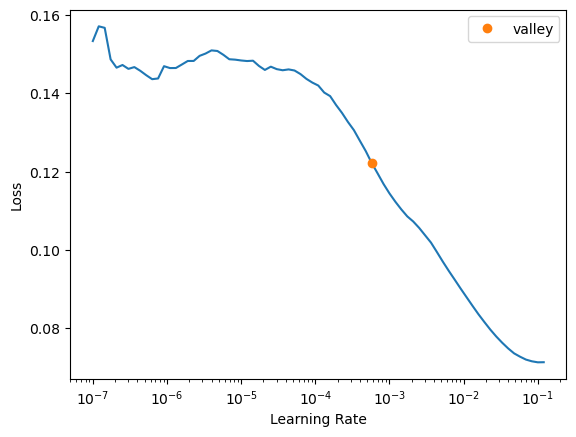

In [58]:

learn = ts_learner(dls, LSTM_FCN, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func

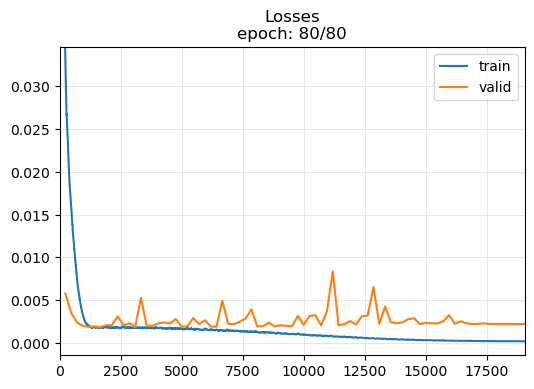

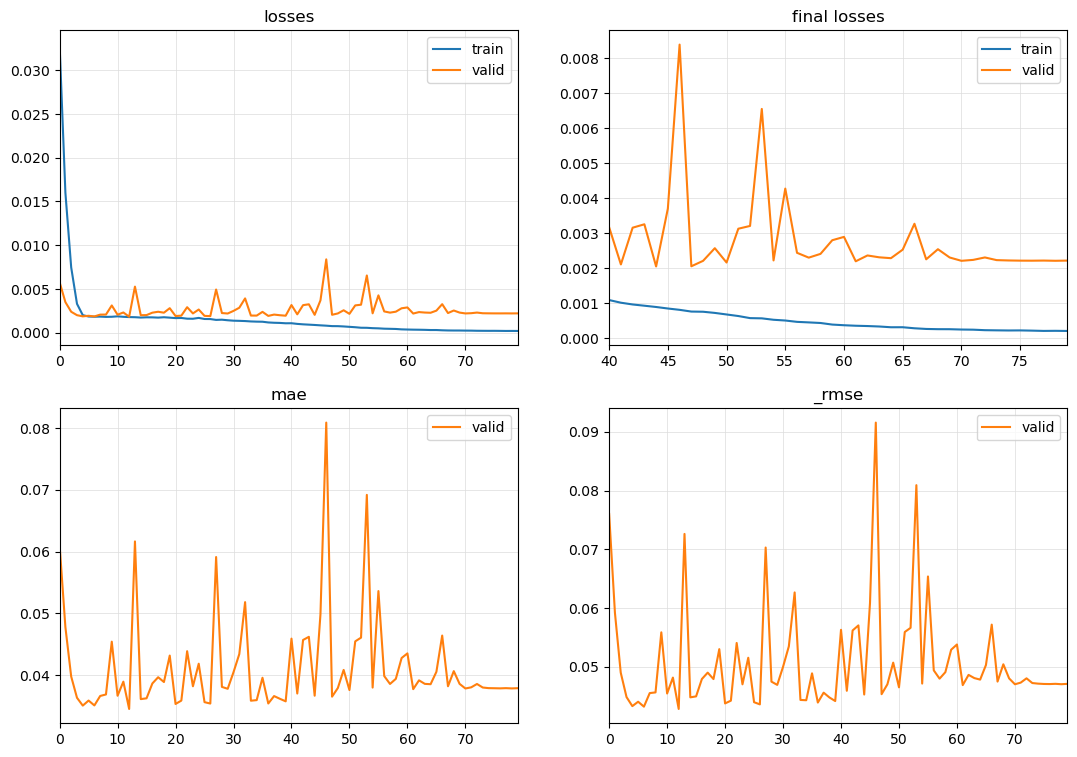

In [59]:

learn = ts_learner(dls, LSTM_FCN, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(80, learn.lr)



In [60]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)


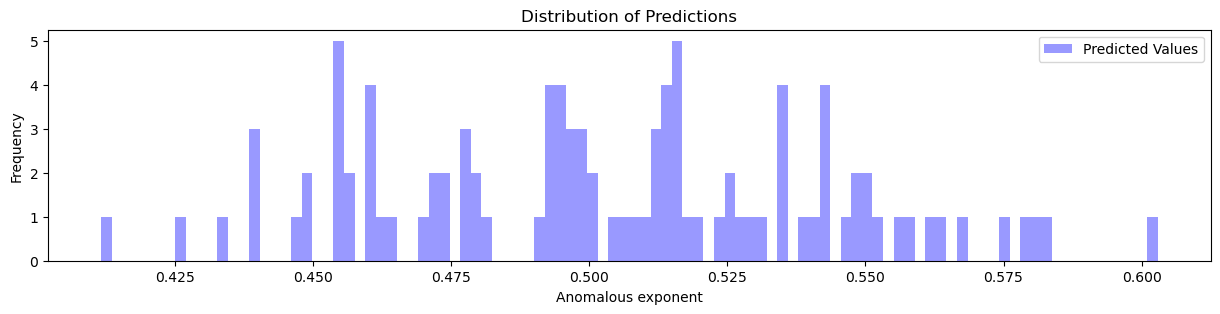

In [61]:

preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# TransformerModel

FlattenedLoss of MSELoss()

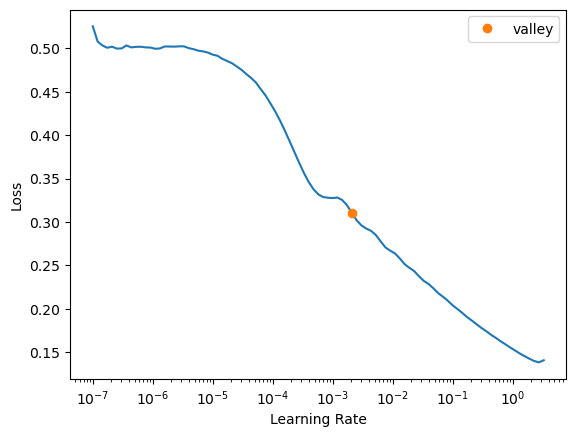

In [62]:

learn = ts_learner(dls, TransformerModel, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func

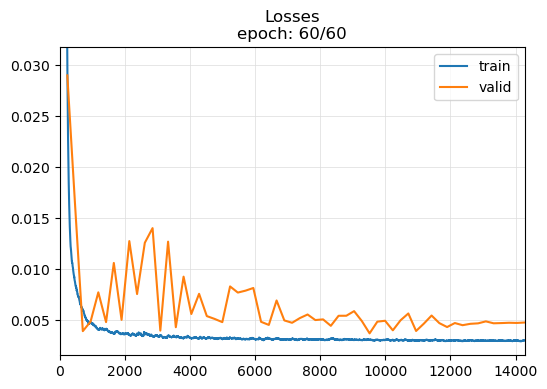

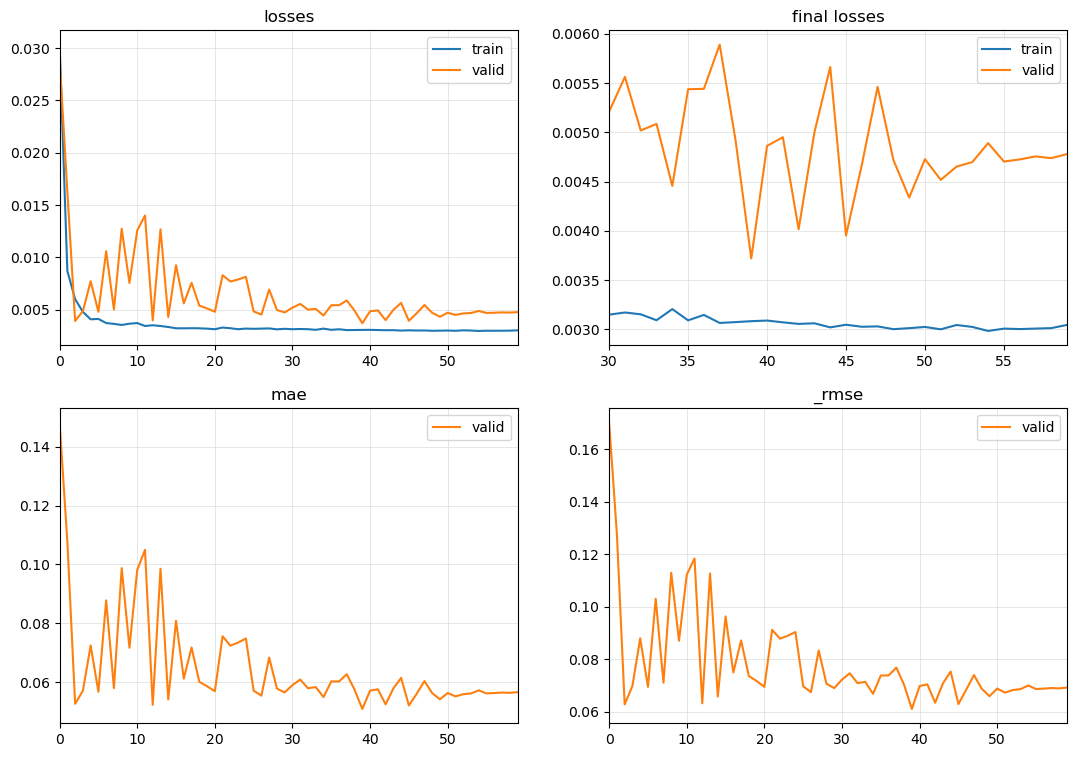

In [64]:

learn = ts_learner(dls, TransformerModel, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(60, learn.lr)


In [65]:


probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)


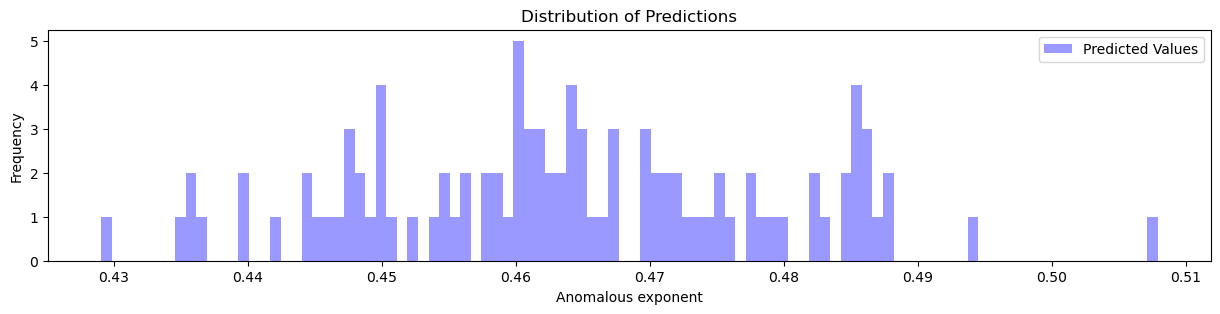

In [66]:

preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# XCM

FlattenedLoss of MSELoss()

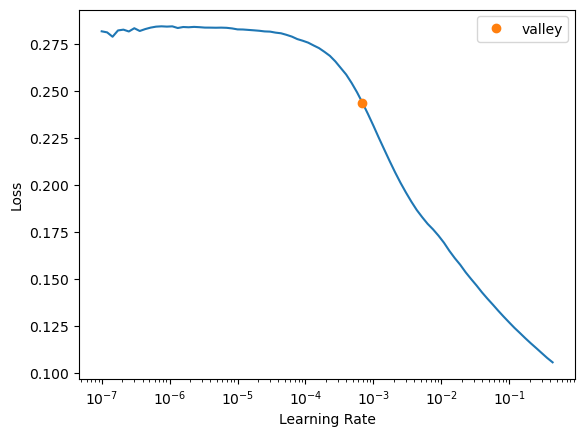

In [67]:

learn = ts_learner(dls, XCM, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func

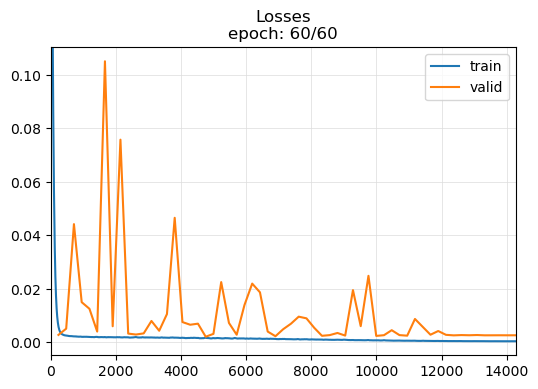

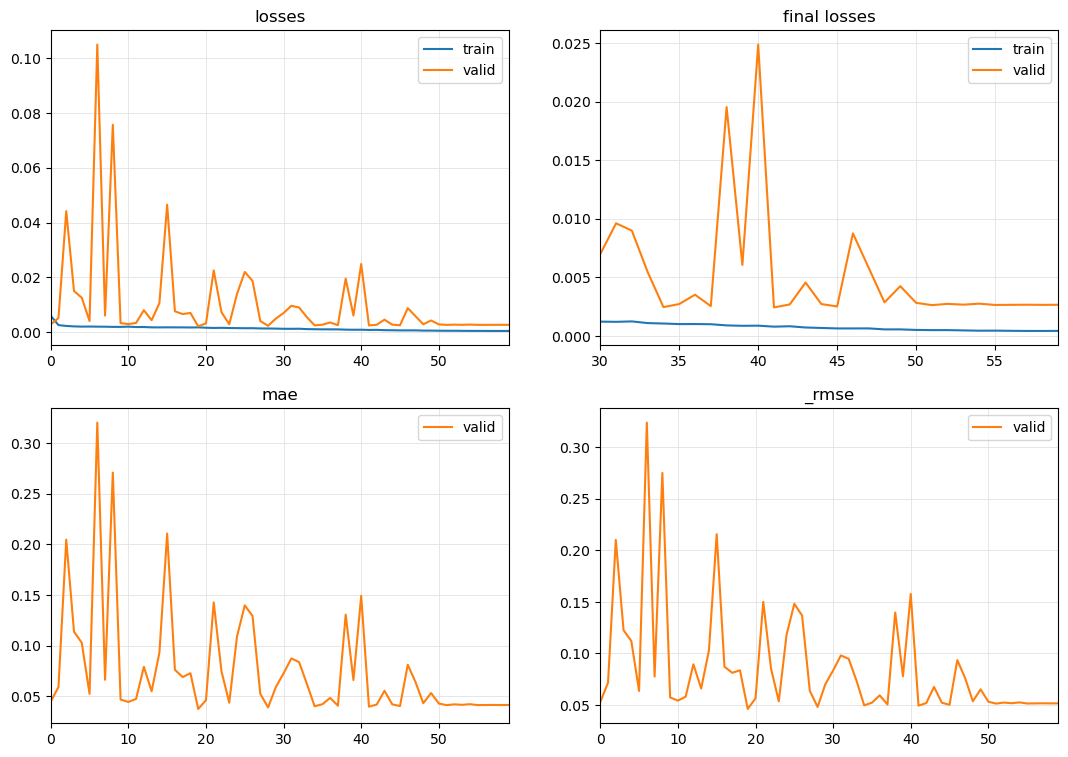

In [68]:

learn = ts_learner(dls, XCM, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(60, learn.lr)


In [69]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)


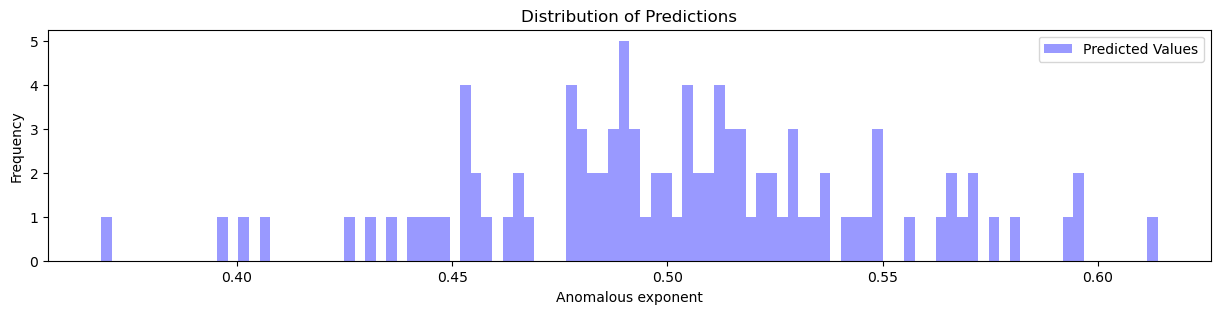

In [70]:


preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# ResCNN

FlattenedLoss of MSELoss()

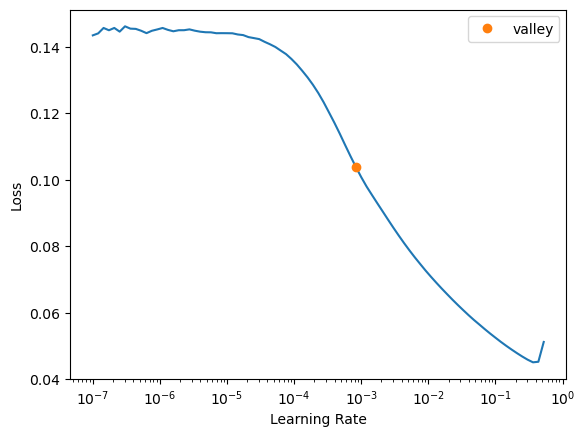

In [71]:

learn = ts_learner(dls, ResCNN, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func

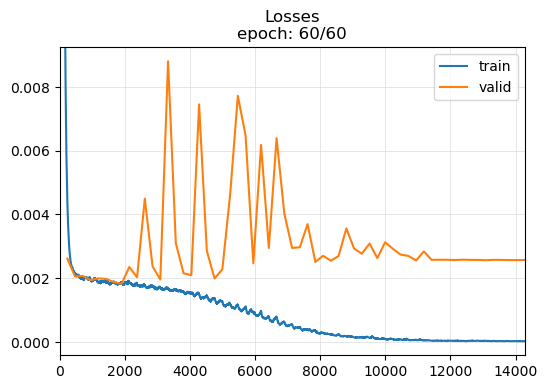

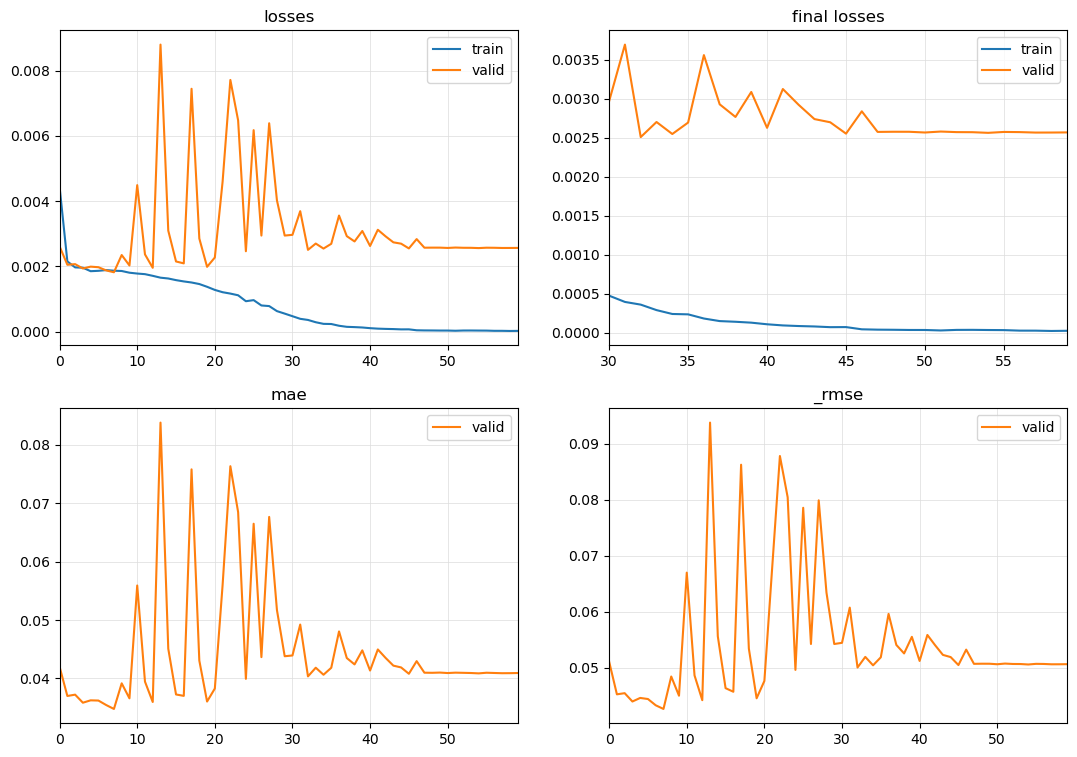

In [72]:

learn = ts_learner(dls, ResCNN, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(60, learn.lr)



In [73]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)


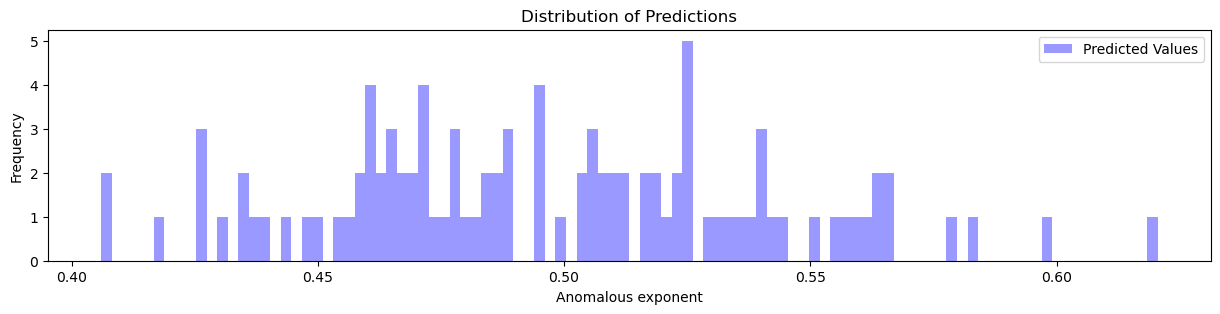

In [74]:

preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# TSSequencerPlus

FlattenedLoss of MSELoss()

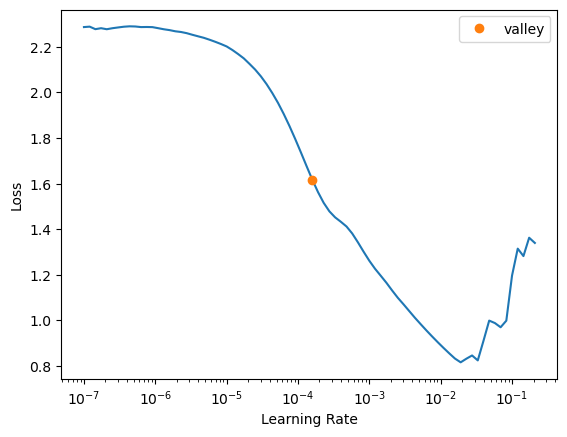

In [75]:

learn = ts_learner(dls, TSSequencerPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func

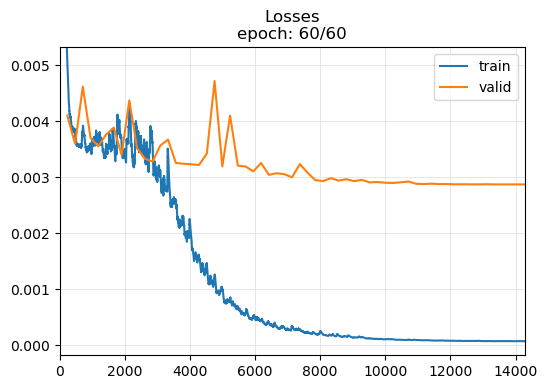

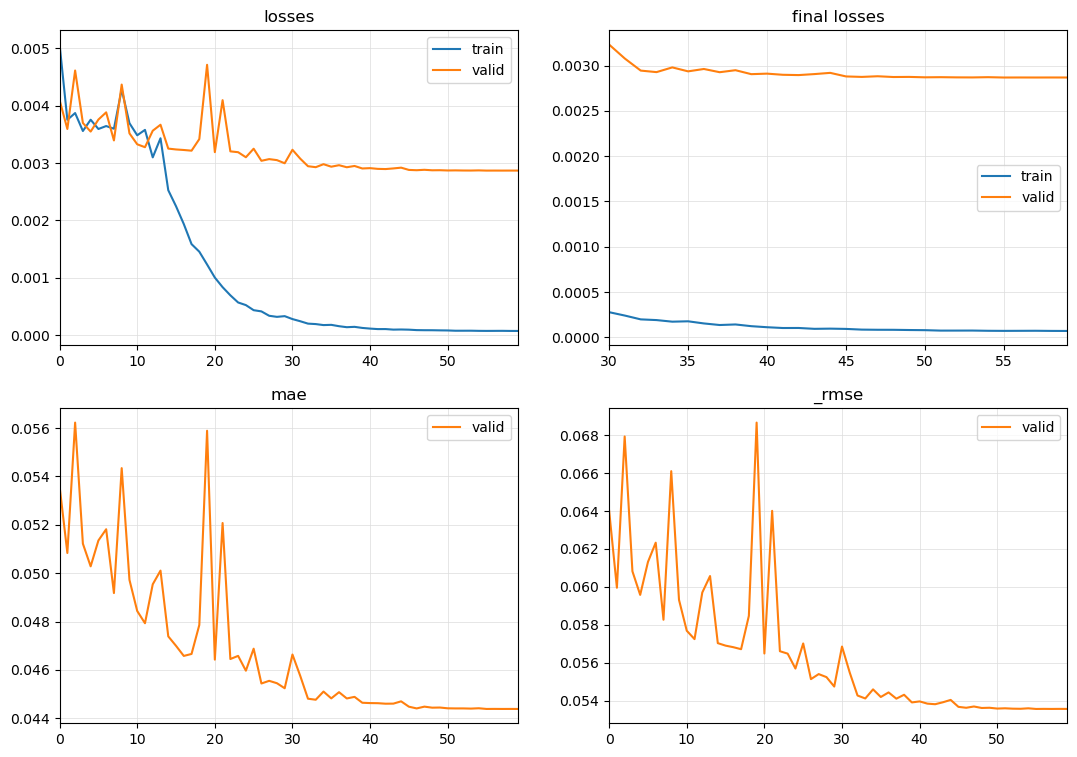

In [76]:

learn = ts_learner(dls, TSSequencerPlus, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(60, learn.lr)



In [77]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)


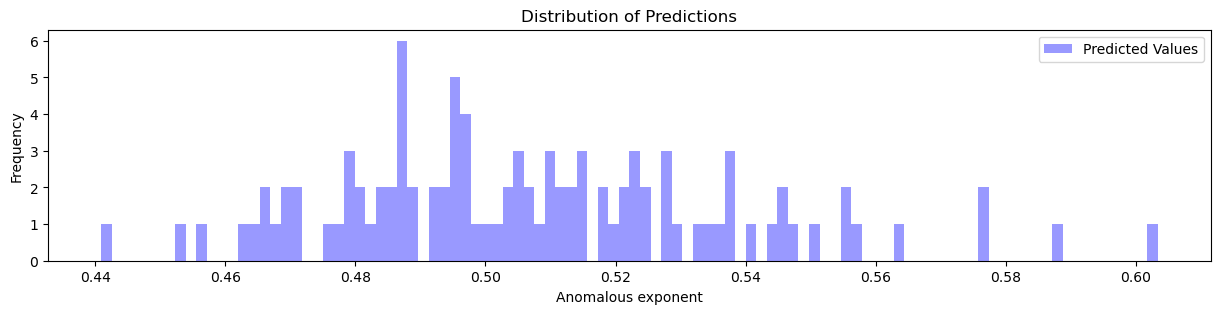

In [78]:

preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()


# GRU_FCN

FlattenedLoss of MSELoss()

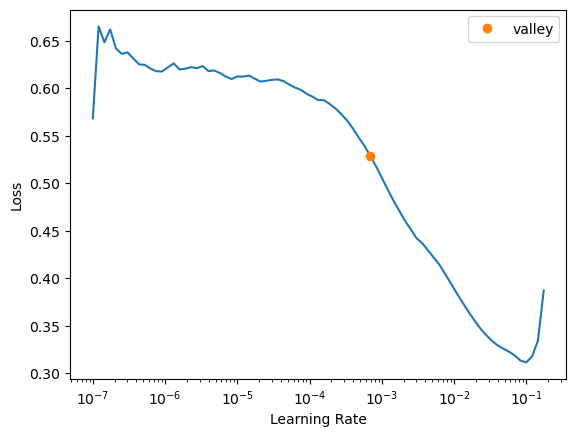

In [79]:

learn = ts_learner(dls, GRU_FCN, metrics=[mae, rmse], cbs=ShowGraph())
learn.lr_find()
learn.loss_func

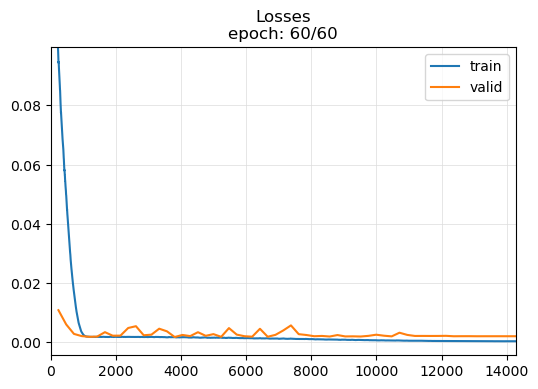

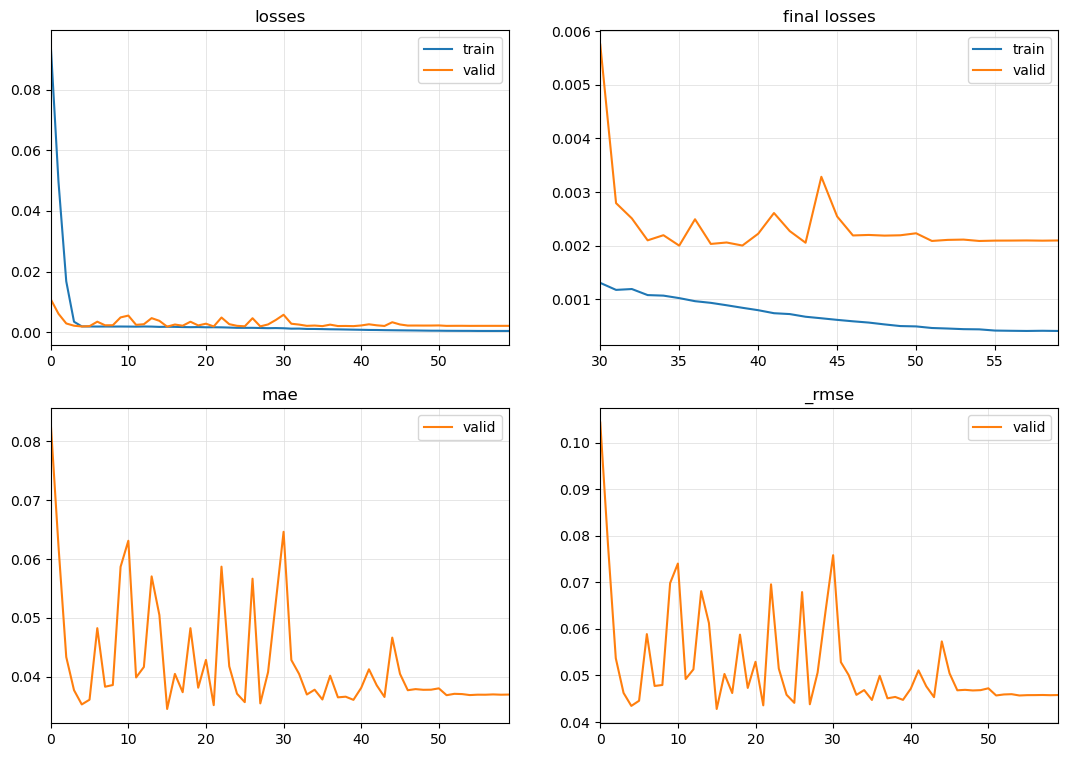

In [80]:

learn = ts_learner(dls, GRU_FCN, metrics=[mae, rmse], cbs=ShowGraph())
learn.fit_one_cycle(60, learn.lr)



In [81]:

probas, _, preds = learn.get_X_preds(trajs[splits[1]])
skm.mean_squared_error(labels_alpha[splits[1]], preds, squared=False)
probas, _, preds = learn.get_X_preds(trajs_test)


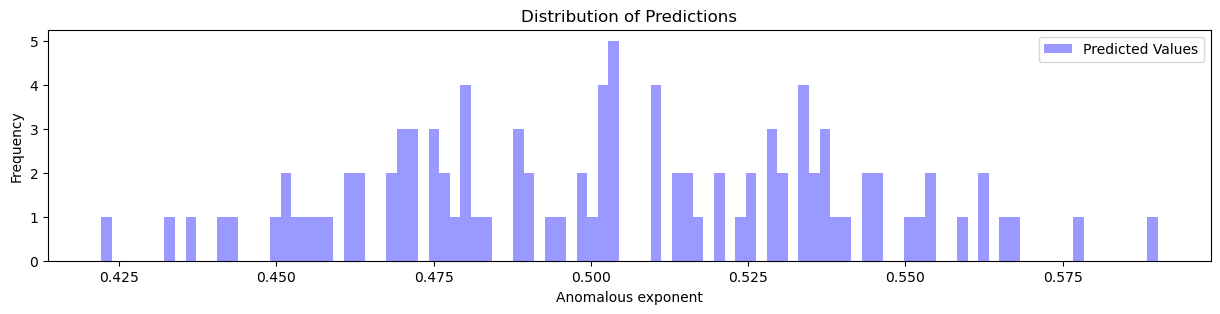

In [82]:

preds_flat = np.array(preds).flatten()  
#Labels_flat = np.array(labels_test).flatten()  

fig, ax = plt.subplots(figsize=(15, 3))
ax.hist(preds_flat, bins=100, alpha=0.4, color='blue', label='Predicted Values')
#ax.hist(Labels_flat, bins=100, alpha=0.4, color='green', label='True Values')
ax.set_title('Distribution of Predictions')
ax.set_xlabel('Anomalous exponent')
ax.set_ylabel('Frequency')
plt.legend()
plt.show()
